<a href="https://colab.research.google.com/github/FajarPrimaPermata/Customer-Segmentation/blob/main/E_Commerce_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-commerce Analysis

## Background

Data E-Commerce Sales Dataset : https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data/data


Analyzing and Maximizing Online Business Performance

Business Question:

1. How has sales performed over the last three months?
2. What is the probability of a purchase being declined, and what factors initiate these rejections?

Objectives:

1. The goal is to discern the optimal strategy for the upcoming month's sales by gaining a comprehensive understanding of the recent sales report.
2. To forecast the probability of order rejections and identify the primary features influencing these rejections.

## Import

Cleaning data in different colab : https://colab.research.google.com/drive/1D7K9bVeg9gd8pEIeMXIdQIAfpQ2NQ3Hn?usp=sharing

In [ ]:
import gdown
import shutil
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime, date,timedelta
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV,train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

Link data : https://drive.google.com/file/d/1TNygKflI3Y5GsZXyngx1tp26F0eWtHy-/view?usp=sharing

In [ ]:
url = "https://drive.google.com/file/d/1TNygKflI3Y5GsZXyngx1tp26F0eWtHy-/view?usp=sharing"
output = "amazon_sales_data.zip"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1TNygKflI3Y5GsZXyngx1tp26F0eWtHy-
To: /content/amazon_sales_data.zip
100%|██████████| 6.18M/6.18M [00:00<00:00, 219MB/s]


'amazon_sales_data.zip'

In [ ]:
shutil.unpack_archive('/content/amazon_sales_data.zip')

In [ ]:
df_amazon = pd.read_csv('/content/df_amazon.csv')
df_amazon.head()

,order_ID,date,ship_status,fulfillment,service_level,style,sku,product_category,size,asin,...,order_quantity,order_amount,city,state,zip,promotion,customer_type,day,month,year
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,...,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,customer,Saturday,April,2022
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,...,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,customer,Saturday,April,2022
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,...,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,business,Saturday,April,2022
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,...,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,customer,Saturday,April,2022
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,...,1,574.00,CHENNAI,TAMIL NADU,600073.0,no promotion,customer,Saturday,April,2022


In [ ]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128797 entries, 0 to 128796
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_ID             128797 non-null  object 
 1   date                 128797 non-null  object 
 2   ship_status          128797 non-null  object 
 3   fulfillment          128797 non-null  object 
 4   service_level        128797 non-null  object 
 5   style                128797 non-null  object 
 6   sku                  128797 non-null  object 
 7   product_category     128797 non-null  object 
 8   size                 128797 non-null  object 
 9   asin                 128797 non-null  object 
 10  courier_ship_status  128797 non-null  object 
 11  order_quantity       128797 non-null  int64  
 12  order_amount         128797 non-null  float64
 13  city                 128797 non-null  object 
 14  state                128797 non-null  object 
 15  zip              

In [ ]:
df_amazon['date'] = pd.to_datetime(df_amazon['date'])

In [ ]:
df_saleReport = pd.read_csv('/content/df_saleReport.csv')
df_saleReport.head()

,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red


In [ ]:
df_may2022 = pd.read_csv('/content/df_may2022.csv')
df_may2022.head()

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


## EDA

In [ ]:
df_amazon['date'].min()

Timestamp('2022-04-01 00:00:00')

In [ ]:
df_amazon['date'].max()

Timestamp('2022-06-29 00:00:00')

* ***Date Range*** - April 01, 2022 to June 29, 2022

In [ ]:
revenue_by_month = df_amazon.groupby('month')['order_amount'].sum()
percent_decrease_apr_to_May = (revenue_by_month['April'] - revenue_by_month['May']) / revenue_by_month['April'] * 100
percent_decrease_May_to_jun = (revenue_by_month['May'] - revenue_by_month['June']) / revenue_by_month['May'] * 100
total_decrease = (revenue_by_month['April'] - revenue_by_month['June']) / revenue_by_month['April'] * 100
print(f"Total revenue for April 2022: INR {revenue_by_month['April']:,.2f}")
print(f"Total revenue for May 2022: INR {revenue_by_month['May']:,.2f}, which is a -{percent_decrease_apr_to_May:.2f}% decrease from April.")
print(f"Total revenue for June 2022: INR {revenue_by_month['June']:,.2f}, which is a -{percent_decrease_May_to_jun:.2f}% decrease from May.")
print(f"Total revenue for Q2 2022 decreased by -{total_decrease:.2f}%")

Total revenue for April 2022: INR 28,838,708.32
Total revenue for May 2022: INR 26,224,517.75, which is a -9.06% decrease from April.
Total revenue for June 2022: INR 23,424,646.38, which is a -10.68% decrease from May.
Total revenue for Q2 2022 decreased by -18.77%


In [ ]:
revenue_by_month = df_amazon.groupby('month')['order_amount'].sum()


### Net Revenue

<ipython-input-99-dad4739d4419>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(range(0,41,5)))


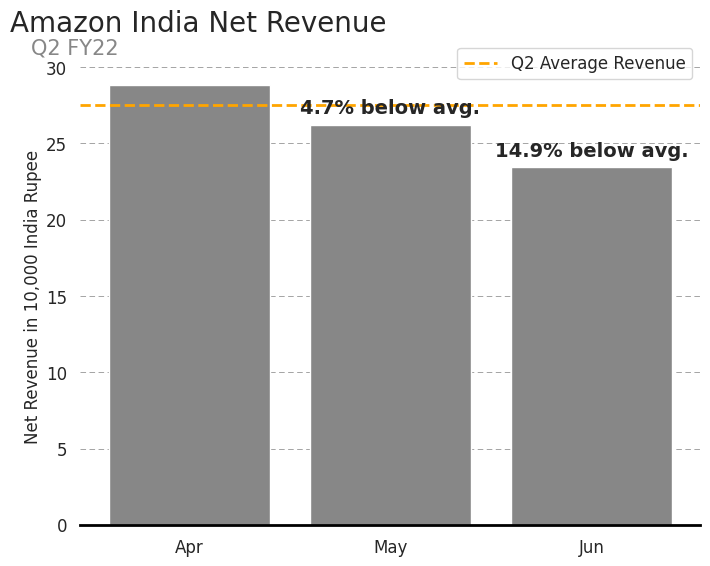

In [ ]:
sns.set_style('whitegrid')

# Group the data by month and calculate the total sales revenue
monthly_sales = df_amazon.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount': 'sum'})

# Get latest month revenue and average quarterly revenue
latest_month_revenue = monthly_sales.tail(1).iloc[0][0]
avg_quarterly_revenue = monthly_sales.tail(3).head(2).mean()[0]

# Compute percentage below average revenue for quarter
pct_below_avg = round((1 - (latest_month_revenue / avg_quarterly_revenue)) * 100, 1)

# Plot the monthly sales revenue
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(monthly_sales.index.strftime('%b'), monthly_sales['order_amount'], color='#878787')

# Add label above each bar with the percentage below the average revenue for the quarter
for i, bar in enumerate(bars):
    if i == len(bars) - 1 or i < len(bars) - 2:
        continue
    month_sales = monthly_sales.iloc[i]['order_amount']
    pct_below_avg = round((1 - (month_sales / avg_quarterly_revenue)) * 100, 1)
    ax.annotate(f'{pct_below_avg}% below avg.',
                xy=(bar.get_x() + bar.get_width()/2, bar.get_height()-7000),
                xytext=(0, 5), textcoords='offset points',  fontweight='bold',
                ha='center', va='bottom', fontsize=14)

# Add label above the latest bar with the percentage below the average revenue for the quarter
latest_bar = bars[-1]
latest_month_sales = latest_bar.get_height()
pct_below_avg = round((1 - (latest_month_sales / avg_quarterly_revenue)) * 100, 1)
ax.annotate(f'{pct_below_avg}% below avg.',
            xy=(latest_bar.get_x() + latest_bar.get_width()/2, latest_bar.get_height()-7000),
            xytext=(0, 5), textcoords='offset points',  fontweight='bold',
            ha='center', va='bottom', fontsize=14)

# Add horizontal line at the average quarterly revenue
plt.axhline(avg_quarterly_revenue, linestyle='--', color='orange',linewidth=2, label='Q2 Average Revenue')

ax.set_title('Amazon India Net Revenue', fontsize=20, x=.19, y=1.05)
ax.text(-.08, 1.02, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_xlabel(None)
ax.set_yticklabels(list(range(0,41,5)))
ax.set_ylabel('Net Revenue in 10,000 India Rupee ', fontsize=12, labelpad=3)

ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)


plt.legend(bbox_to_anchor=(1,1.05), fontsize=12, fancybox=True)

ax.tick_params(axis='both', labelsize=12)
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()

In [ ]:
monthly_sales

,order_amount
date,
2022-04-30,28838708.32
2022-05-31,26224517.75
2022-06-30,23424646.38


In [ ]:
28838708.32+26224517.75 +23424646.38

78487872.45

### Average monthly Order Amount

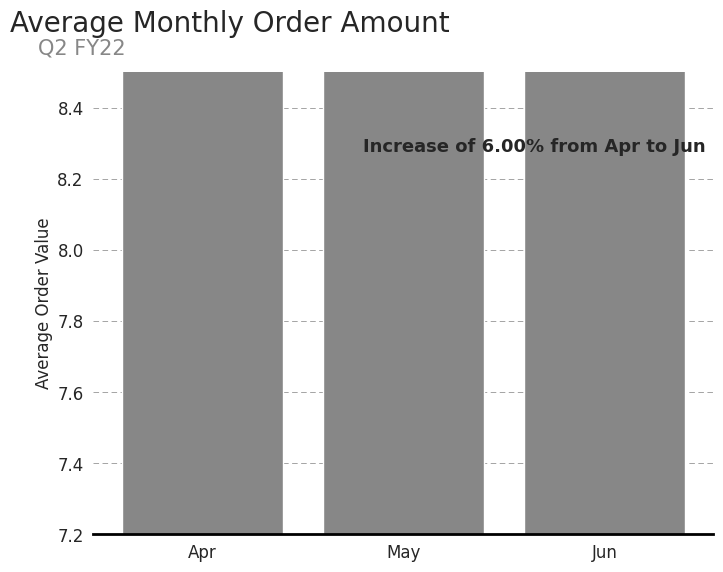

In [ ]:
# Group the data by month and calculate the average order value
monthly_aov = df_amazon.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount': 'sum', 'order_ID': 'nunique'})
monthly_aov['average_order_value'] = monthly_aov['order_amount'] / monthly_aov['order_ID']

# Calculate percent change from previous month
monthly_aov['pct_change'] = monthly_aov['average_order_value'].pct_change() * 100

# Create a barplot of the average order value per month
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=monthly_aov.index.strftime('%b'), y=monthly_aov['average_order_value'], ax=ax, color='#878787')

# Add line plot of the average order value per month
ax.plot(monthly_aov.index.strftime('%b'), monthly_aov['average_order_value'], linestyle='--', linewidth=2, color='orange', marker='o')


# Add callout for percent increase from April to June
apr_val = monthly_aov['average_order_value'][0]
jun_val = monthly_aov['average_order_value'][2]
pct_change = ((jun_val - apr_val) / apr_val) * 100
ax.annotate(f'Increase of {pct_change:.2f}% from Apr to Jun',fontweight='bold',
            xy=(2,8.074941567466606), xytext=(1.65, 8.264941567466606), fontsize=13, ha='center',
            va='bottom')#, arrowprops=dict(arrowstyle='->', color='black', lw=1.5, connectionstyle="arc3,rad=-0.1"))

# Set labels and title
ax.set_title('Average Monthly Order Amount', fontsize=20, x=.22, y=1.07)
ax.text(-0.09, 1.04, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_xlabel(None)
ax.set_ylabel('Average Order Value', fontsize=12, labelpad=3)
ax.set_ylim(7.20, 8.50)
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))

ax.tick_params(axis='both', labelsize=12)
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

plt.show()

In [ ]:
monthly_aov

,order_amount,order_ID,average_order_value,pct_change
date,,,,
2022-04-30,28838708.32,45858,628.869735,NaN
2022-05-31,26224517.75,39221,668.634603,6.323228
2022-06-30,23424646.38,35141,666.590205,-0.305757


In [ ]:
revenue_by_category = df_amazon.groupby('product_category')['order_amount'].sum().sort_values(ascending=False)
print("Total revenue by product category:")
print(revenue_by_category.apply(lambda x: "INR {:,.2f}".format(x)))

Total revenue by product category:
product_category
Set              INR 39,148,138.03
kurta            INR 21,264,270.13
Western Dress    INR 11,208,419.41
Top               INR 5,343,281.30
Ethnic Dress        INR 790,118.66
Blouse              INR 458,128.18
Bottom              INR 150,667.98
Saree               INR 123,933.76
Dupatta                 INR 915.00
Name: order_amount, dtype: object


In [ ]:
revenue_by_category = df_amazon.groupby('product_category')['order_amount'].sum()
percent_revenue_by_category = ((revenue_by_category / revenue_by_category.sum()) * 100).sort_values(ascending=False)
percent_revenue_by_category = percent_revenue_by_category.apply(lambda x: "{:.2f}%".format(x))
print("Percentage of revenue by product category:")
print(percent_revenue_by_category)

Percentage of revenue by product category:
product_category
Set              49.88%
kurta            27.09%
Western Dress    14.28%
Top               6.81%
Ethnic Dress      1.01%
Blouse            0.58%
Bottom            0.19%
Saree             0.16%
Dupatta           0.00%
Name: order_amount, dtype: object


In [ ]:
avg_price_by_category = df_amazon.groupby('product_category')['order_amount'].mean()
avg_price_by_category = avg_price_by_category.sort_values(ascending=False)
print("Top 5 product categories by average price:")
print(avg_price_by_category.head(5))

Top 5 product categories by average price:
product_category
Set              779.750190
Saree            755.693659
Western Dress    723.543955
Ethnic Dress     682.313178
Top              503.465684
Name: order_amount, dtype: float64


In [ ]:
cancelled_orders = df_amazon[df_amazon['ship_status'].isin(['Cancelled', 'Shipped - Lost in Transit'])]
returned_orders = df_amazon[df_amazon['ship_status'].isin(['Shipped - Returned to Seller', 'Shipped - Returning to Seller', 'Shipped - Rejected by Buyer', 'Shipped - Damaged'])]
total_cancelled = len(cancelled_orders)
total_returned = len(returned_orders)
total_cancelled_returned = total_cancelled + total_returned
percent_cancelled = total_cancelled / len(df_amazon) * 100
percent_returned = total_returned / len(df_amazon) * 100
percent_cancelled_returned = total_cancelled_returned / df_amazon['order_quantity'].sum() * 100
print(f"Total cancelled orders: {total_cancelled}, which is {percent_cancelled:.2f}% of all orders.")
print(f"Total returned orders: {total_returned}, which is {percent_returned:.2f}% of all orders.")
print(f"This represents {percent_cancelled_returned:.2f}% of all orders.")

Total cancelled orders: 18316, which is 14.22% of all orders.
Total returned orders: 2109, which is 1.64% of all orders.
This represents 17.53% of all orders.


In [ ]:
monthly_order_data = df_amazon.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount': 'mean', 'order_quantity': 'mean'})
monthly_order_data = monthly_order_data.rename(columns={'order_amount_($)': 'average_order_amount', 'order_quantity': 'average_order_quantity'})
print(monthly_order_data)

            order_amount  average_order_quantity
date                                            
2022-04-30    587.765379                0.900968
2022-05-31    623.858544                0.904177
2022-06-30    621.409337                0.909248


In [ ]:
popular_category_by_state = df_amazon.groupby(['state', 'product_category'])['order_quantity'].sum().reset_index()
popular_category_by_state = popular_category_by_state.sort_values(['state', 'order_quantity'], ascending=[True, False])
popular_category_by_state = popular_category_by_state.drop_duplicates(subset=['state'])
print("Most popular product category in each state:")
print(popular_category_by_state)

Most popular product category in each state:
                  state product_category  order_quantity
1    ANDAMAN & NICOBAR               Set             108
12       ANDHRA PRADESH            kurta            2298
13                  APO              Set               0
14                   AR              Top               1
17    ARUNACHAL PRADESH              Set              55
..                  ...              ...             ...
314              orissa              Set               1
315              punjab              Set               8
320           rajasthan              Top               2
322            rajsthan            kurta               1
326             unknown            kurta              14

[70 rows x 3 columns]


In [ ]:
avg_order_amount_by_customer_type = df_amazon.groupby('customer_type')['order_amount'].mean()
print("Average order amount by customer type:")
print(avg_order_amount_by_customer_type.apply(lambda x: "INR {:,.2f}".format(x)))

Average order amount by customer type:
customer_type
business    INR 678.78
customer    INR 608.92
Name: order_amount, dtype: object


### Top Product Revenue  by Month

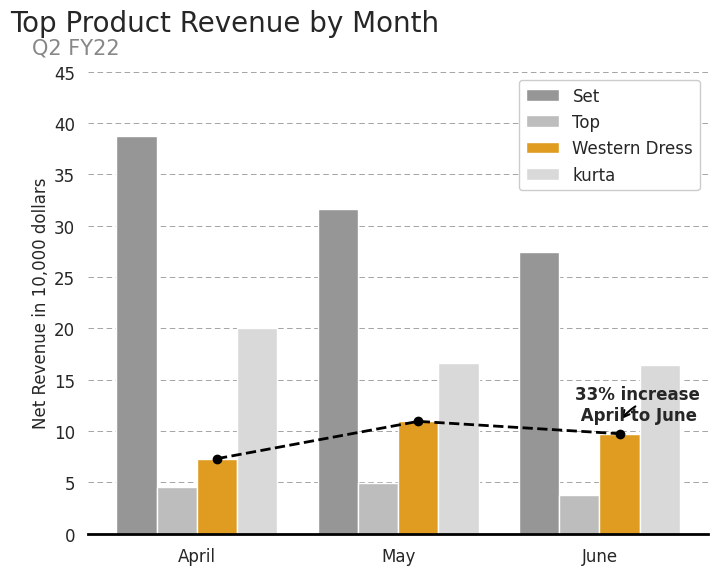

In [ ]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(figsize=(8,6))

# Define the desired order of months
month_order = ['April', 'May', 'June']

# Filter the data to only include the four product categories of interest
sales_data = df_amazon[df_amazon['product_category'].isin(['Western Dress', 'Top', 'kurta', 'Set'])]

# Convert the date column to a datetime object
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Extract the month from the date column and set it as a new column
sales_data['month'] = sales_data['date'].dt.month_name()

# Aggregate the sales data by month and product category
sales_by_month = sales_data.groupby(['month', 'product_category'])['order_amount'].sum().reset_index()

# Convert the month column to a categorical data type with the desired order
sales_by_month['month'] = pd.Categorical(sales_by_month['month'], categories=month_order, ordered=True)

# Plot the sales data using seaborn
ax = sns.barplot(x='month', y='order_amount', hue='product_category', data=sales_by_month,
                 palette=['#969696', '#bdbdbd', 'orange', '#d9d9d9'])

# Extract the sales data for Western Dress
sales_wd = sales_by_month[sales_by_month['product_category'] == 'Western Dress'].reset_index(drop=True)
sales_wd['month'] = pd.Categorical(sales_wd['month'], categories=month_order, ordered=True)
sales_wd.sort_values(by='month',inplace=True)
# Add line plot for total monthly revenue of Western Dress
ax.plot([0.1,1.1,2.1], sales_wd['order_amount'], color='black', linestyle='--', linewidth=2, marker='o')


# Add annotation for percent increase from April to June for Western Dress
pct_increase = (sales_wd.loc[1, 'order_amount'] - sales_wd.loc[0, 'order_amount']) / sales_wd.loc[0, 'order_amount'] * 100
ax.annotate(f'{pct_increase:.0f}% increase\n April to June',fontweight='bold', xy=(2.1, sales_wd.loc[2, 'order_amount']), xytext=(1.88, sales_wd.loc[2, 'order_amount'] + 40000),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5, connectionstyle="arc3,rad=0.1"))


# Set the number of y ticks you want
num_y_ticks = 10

# Calculate the y tick values
y_tick_values = np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], num_y_ticks)

# Set the y ticks
ax.set_yticks(y_tick_values)


# Add title and axis labels
ax.set_title('Top Product Revenue by Month', fontsize=20, x=.22, y=1.07)
ax.text(-0.09, 1.04, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)

plt.legend(bbox_to_anchor=(1,1), fontsize=12, framealpha=1)

ax.set_xlabel(None)
ax.set_ylabel('Net Revenue in 10,000 dollars', fontsize=12, labelpad=3)
ax.set_yticklabels(list(range(0,46,5)))
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))

ax.tick_params(axis='both', labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')


# Show the plot
plt.show()
fig.savefig('Avg_MOV.png', dpi=300)
warnings.filterwarnings('default')  # Re-enable the warnings

### Percentage of Product Category for Net Revenue

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


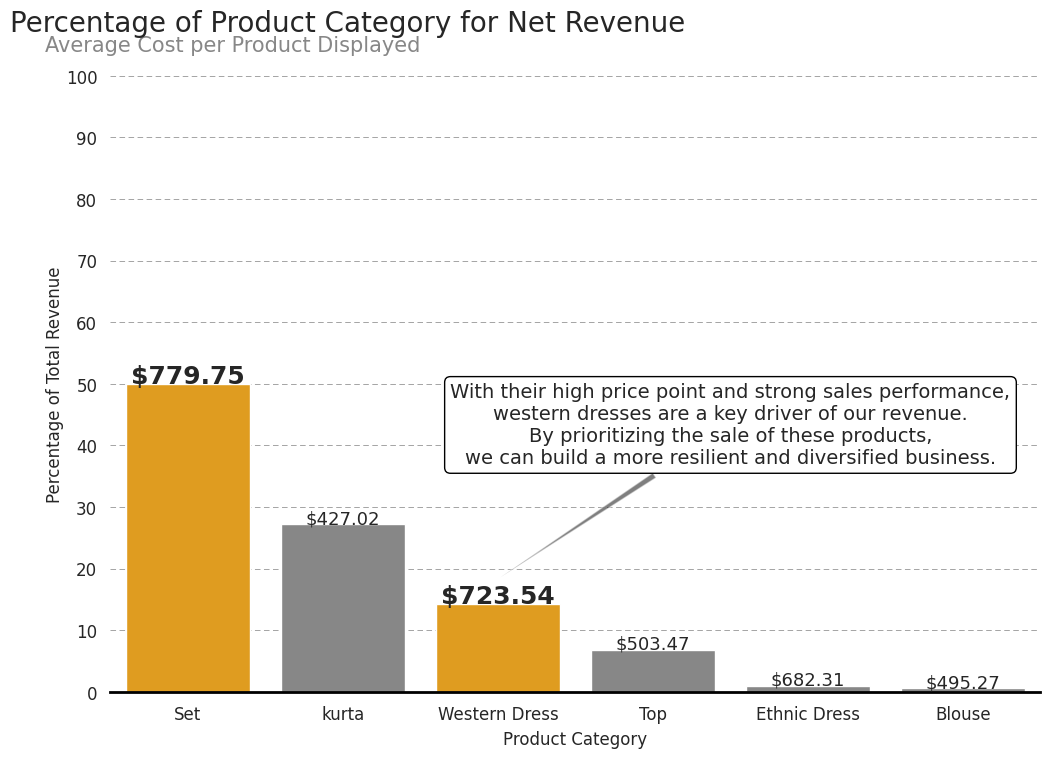

In [ ]:
# Group the data by product category and calculate the total sales
sales_by_category = df_amazon.groupby('product_category')['order_amount'].sum()

# Filter the categories to include
included_categories = ['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Blouse']
sales_by_category = sales_by_category.loc[included_categories]

# Calculate the total revenue
total_revenue = sales_by_category.sum()

# Calculate the percentage of total revenue for each category
sales_by_category_pct = (sales_by_category / total_revenue) * 100

# Sort the categories by total sales
sales_by_category_pct = sales_by_category_pct.sort_values(ascending=False)

# Create a bar chart to show the sales by product category
fig, ax = plt.subplots(figsize=(12,8))
palette_colors = ['orange' if cat in ['Set', 'Western Dress'] else '#878787' for cat in sales_by_category_pct.index]
sns.barplot(x=sales_by_category_pct.index, y=sales_by_category_pct.values, ax=ax, palette=palette_colors)

# Set font sizes for x and y labels, title, and ticks
# Set the number of y ticks you want
num_y_ticks = 10

# Calculate the y tick values
y_tick_values = list(range(0,101,10))#np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], num_y_ticks)

# Set the y ticks
ax.set_yticks(y_tick_values)

ax.set_ylabel('Percentage of Total Revenue', labelpad=1)
ax.set_ylim(0, 100)
ax.set_xlabel('Product Category', labelpad=5)
ax.set_title('Percentage of Product Category for Net Revenue', fontsize=20, x=0.255, y=1.05, pad=10)
ax.text(-.07, 1.04, 'Average Cost per Product Displayed', fontsize=15, color='#878787', transform=ax.transAxes)
ax.tick_params(axis='both', labelsize=12)
#ax.set_yticklabels(list(range(0,101,10)))
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)

# Set font sizes for the bars and add annotations for Set, kurta, and Western Dress
for i, category in enumerate(sales_by_category_pct.index):
    avg_cost = df_amazon[df_amazon['product_category'] == category]['order_amount'].mean()
    if category in ['Set', 'Western Dress']:
        ax.text(i, sales_by_category_pct.values[i] +.1, f'${avg_cost:.2f}', ha='center', fontsize=18, fontweight='bold')
    else:
        ax.text(i, sales_by_category_pct.values[i] +.1, f'${avg_cost:.2f}', ha='center', fontsize=13)


# Add a callout to emphasize the importance of western dresses for diversifying revenue
western_sales = sales_by_category_pct['Western Dress']
western_index = sales_by_category_pct.index.get_loc('Western Dress')

# Define the callout box properties
bbox_props = dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=1)
arrow_props = dict(facecolor='black', arrowstyle='wedge', alpha=0.5)

# Set the position of the callout box
x_pos = western_index
y_pos = western_sales + 2
x_text = x_pos + 0.5
y_text = y_pos - 8

# Calculate the percentage of revenue from western dresses
western_pct = (western_sales / total_revenue) * 100

# Add the callout box to the plot
ax.annotate('With their high price point and strong sales performance,\nwestern dresses are a key driver of our revenue.\nBy prioritizing the sale of these products,\nwe can build a more resilient and diversified business.', xy=(x_pos, y_pos+2), xytext=(x_text+1, y_text+35), fontsize=14,
arrowprops=arrow_props, bbox=bbox_props, ha='center', va='center')


# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()
fig.savefig('Percent_Prod_Revenuw.png', dpi=300)

### Sales By Product Size

In [ ]:
# Define the desired order for the 'size' column
size_order = ['Free','XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL']

# Create an ordered categorical variable for the 'size' column
df_amazon['size'] = pd.Categorical(df_amazon['size'], categories=size_order, ordered=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<ipython-input-107-06b92926d330>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(range(0,20,2)))


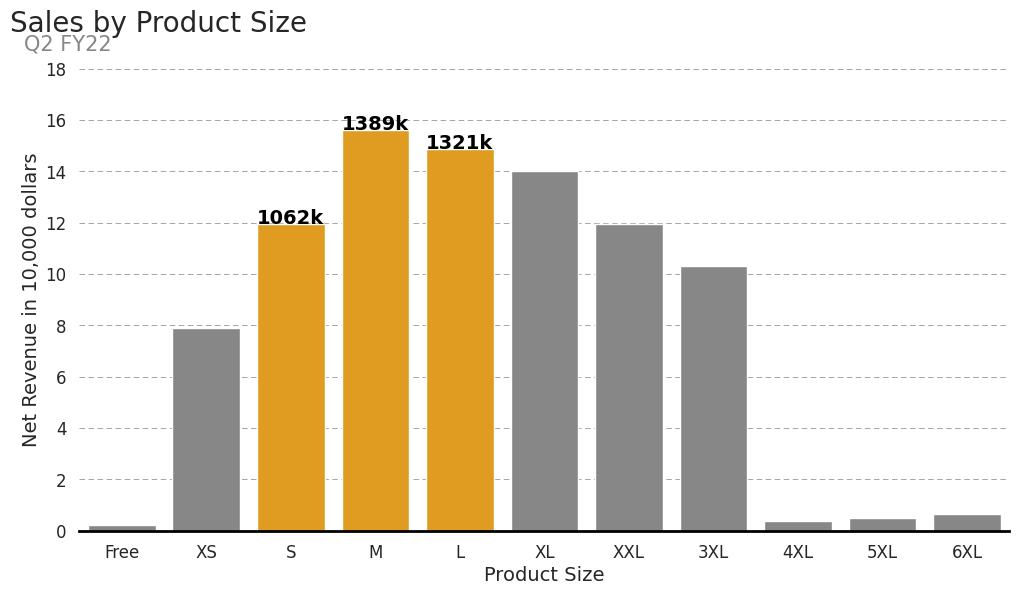

In [ ]:
# Group the data by product size and calculate the total sales
sales_by_size = df_amazon.groupby('size')['order_amount'].sum()

# Create a horizontal bar chart to show the sales by product size
fig, ax = plt.subplots(figsize=(12,6))

# Use a color palette to highlight specific sizes
palette_colors = ['orange' if size in ['S', 'M', 'L'] else '#878787' for size in sales_by_size.index]
sns.barplot(x=sales_by_size.index, y=sales_by_size.values, ax=ax, palette=palette_colors)


# Set font sizes for x and y labels, title, and ticks
ax.set_xlabel('Product Size', labelpad=3, fontsize=14)
ax.set_ylabel('Net Revenue in 10,000 dollars', labelpad=3, fontsize=14)
ax.set_yticklabels(list(range(0,20,2)))
ax.set_title('Sales by Product Size', fontsize=20, x=0.085, y=1.05, pad=10)
ax.text(-0.06, 1.04, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
#ax.set_title('Top Product Revenue by Month', fontsize=20, x=.22, y=1.07)


ax.tick_params(axis='both', labelsize=12)
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)


# Set the number of y ticks you want
num_y_ticks = 10

# Calculate the y tick values
y_tick_values = np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], num_y_ticks)

# Set the y ticks
ax.set_yticks(y_tick_values)

# Set font sizes for the bars and add annotations for S, M, and L sizes
for i, size in enumerate(sales_by_size.index):
    if size in ['S', 'M', 'L']:
        ax.text(i, sales_by_size.values[i], f'{sales_by_size.values[i]/10000:.0f}k', ha='center', fontsize=14, fontweight='bold', color='black')


# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

plt.show()
fig.savefig('Sales_Prod_Size.png', dpi=300)

### identifying Top 4 Products for Top 5 States in Each Revenue Quartile

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-108-1edef6f9738d>:23: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  top_products += sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == q].index)].groupby('state').apply(lambda x: x.nlargest(3, 'order_amount'))['product_category'].tolist()


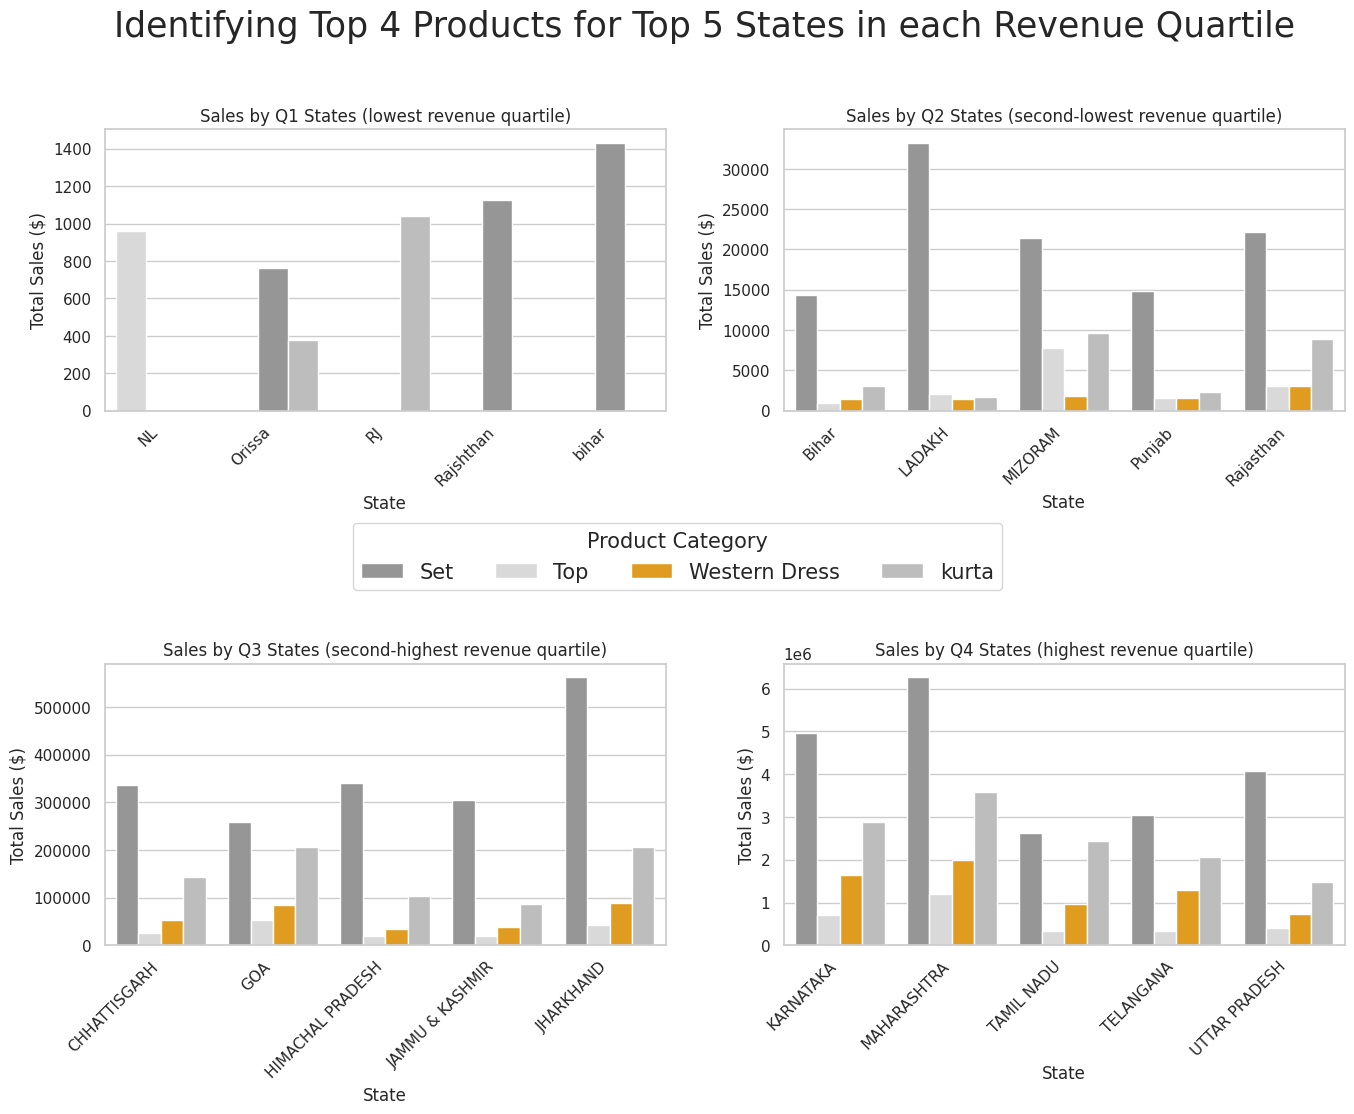

In [ ]:
#Define the color palette for the product categories
colors = {'Top': '#d9d9d9', 'Set': '#969696', 'kurta': '#bdbdbd', 'Western Dress':'orange'}

# Group the data by state and calculate the total sales
sales_by_state = df_amazon.groupby('state')['order_amount'].sum()

# Get the top 5 and bottom 5 states by sales
n_states = len(sales_by_state)
quartiles = pd.qcut(sales_by_state, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
top_states = []
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    top_states += sales_by_state[quartiles == q].nlargest(5).index.tolist()

# Filter the dataframe to include only the top states
top_sales = df_amazon[df_amazon['state'].isin(top_states)]

# Group the data by state and product, and calculate the total sales
sales_by_state_product = top_sales.groupby(['state', 'product_category'])['order_amount'].sum().reset_index()

# Get the top 3 products for each quartile
top_products = []
for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    top_products += sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == q].index)].groupby('state').apply(lambda x: x.nlargest(3, 'order_amount'))['product_category'].tolist()

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharey=False)

# Create the subplot for quartile 1
q1_sales = sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == 'Q1'].index)]
q1_sales = q1_sales[q1_sales['product_category'].isin(top_products)]
sns.barplot(x='state', y='order_amount', hue='product_category', data=q1_sales, ax=axs[0, 0], palette=colors)
axs[0, 0].legend().set_visible(False)
axs[0, 0].set_title('Sales by Q1 States (lowest revenue quartile)')
axs[0, 0].set_xlabel('State')
axs[0, 0].set_ylabel('Total Sales ($)')

# Create the subplot for quartile 2
q2_sales = sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == 'Q2'].index)]
q2_sales = q2_sales[q2_sales['product_category'].isin(top_products)]
sns.barplot(x='state', y='order_amount', hue='product_category', data=q2_sales, palette=colors, ax=axs[0, 1])
axs[0, 1].legend().set_visible(False)
axs[0, 1].set_title('Sales by Q2 States (second-lowest revenue quartile)')
axs[0, 1].set_xlabel('State')
axs[0, 1].set_ylabel('Total Sales ($)')

# Create the subplot for quartile 3
q3_sales = sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == 'Q3'].index)]
q3_sales = q3_sales[q3_sales['product_category'].isin(top_products)]
sns.barplot(x='state', y='order_amount', hue='product_category', data=q3_sales, palette=colors, ax=axs[1, 0])
axs[1, 0].legend().set_visible(False)
axs[1, 0].set_title('Sales by Q3 States (second-highest revenue quartile)')
axs[1, 0].set_xlabel('State')
axs[1, 0].set_ylabel('Total Sales ($)')

# Create the subplot for quartile 4
q4_sales = sales_by_state_product[sales_by_state_product['state'].isin(sales_by_state[quartiles == 'Q4'].index)]
q4_sales = q4_sales[q4_sales['product_category'].isin(top_products)]
sns.barplot(x='state', y='order_amount', hue='product_category', data=q4_sales, palette=colors, ax=axs[1, 1])
axs[1, 1].legend().set_visible(False)
axs[1, 1].set_title('Sales by Q4 States (highest revenue quartile)')
axs[1, 1].set_xlabel('State')
axs[1, 1].set_ylabel('Total Sales ($)')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=.9, wspace=.21, bottom=.2)

# Rotate the x-axis tick labels
for ax in axs.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Add a single legend to the figure
handles, labels = axs[1, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center', ncol=len(labels), title='Product Category', fontsize=15, title_fontsize = 15)


plt.suptitle("Identifying Top 4 Products for Top 5 States in each Revenue Quartile", fontsize = 25)
# Show the figure
plt.show()
fig.savefig('Top_Products_Top_States.png', dpi=300)

### Trend Analys

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: title={'center': 'Monthly Sales'}, xlabel='Total Sales'>

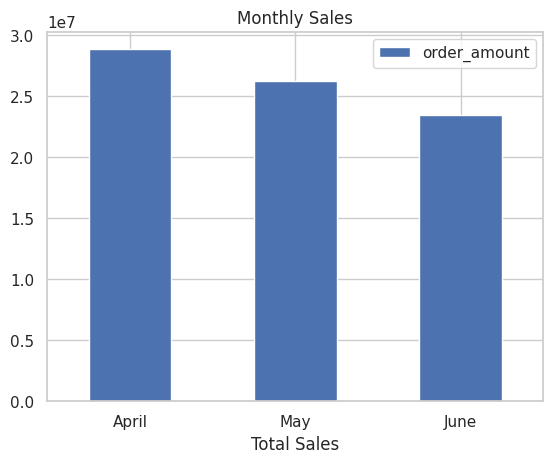

In [ ]:
aggregated_category = df_amazon.groupby(['month'])['order_amount'].sum().reset_index()
month_order = ['April','May','June']
aggregated_category['month'] = pd.Categorical(aggregated_category['month'], categories=month_order, ordered=True) #Membuat kategori bulan sesuai urutan
aggregated_category.sort_values('month').plot(kind='bar',x='month', rot=0,y='order_amount', xlabel='Total Sales', title='Monthly Sales')

As evident from the data, there has been a decline over the past three months. We require the implementation of a marketing campaign to bolster sales. Our approach will involve analyzing both weekend and weekday data to determine the most suitable promotional strategies to pursue.

<Axes: xlabel='month'>

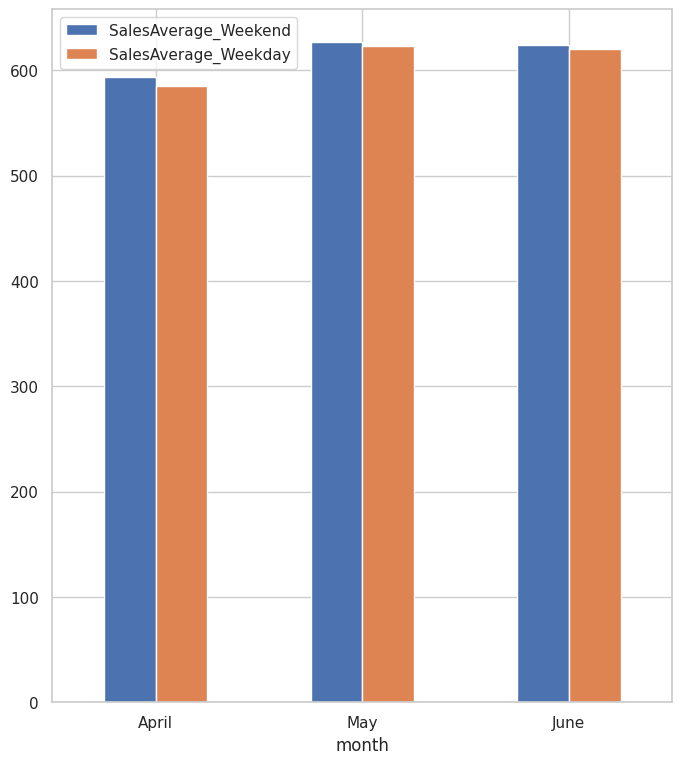

In [ ]:
Weekend = df_amazon['day'].isin(['Saturday', 'Sunday'])
Weekday = df_amazon['day'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])

df_amazon_weekend = df_amazon[Weekend].groupby('month')['order_amount'].mean()
df_amazon_weekday = df_amazon[Weekday].groupby('month')['order_amount'].mean()

concat = pd.concat((df_amazon_weekend,df_amazon_weekday),axis=1,keys=['SalesAverage_Weekend','SalesAverage_Weekday']).reset_index()
concat['month'] = pd.Categorical(concat['month'],categories=month_order,ordered=True)
concat.sort_values(by='month',ascending=True).plot(kind='bar', rot=0,x='month',y=['SalesAverage_Weekend','SalesAverage_Weekday'],figsize=(8,9))

The average sales on weekdays and weekends in each month do not exhibit significant differences. This indicates that the average customers do not possess any distinct temporal preferences when it comes to shopping.

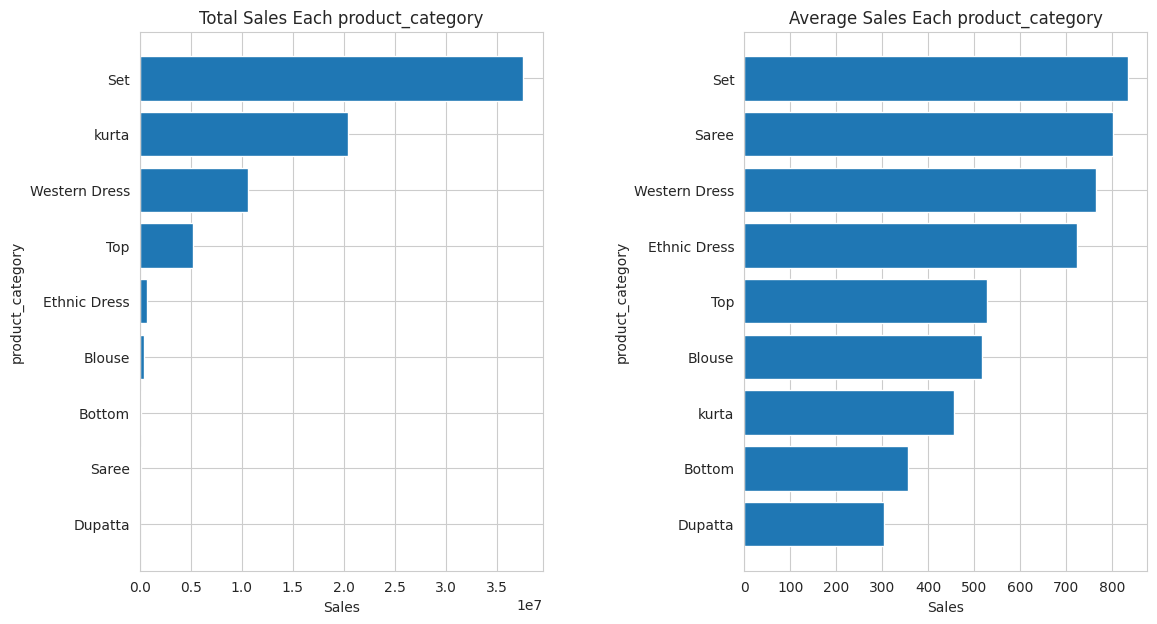

In [ ]:
product_category_total = df_amazon[df_amazon['order_quantity']>0].groupby('product_category')['order_amount'].sum().reset_index().sort_values(by='order_amount',ascending=True)
product_category_average = df_amazon[df_amazon['order_quantity']>0].groupby('product_category')['order_amount'].mean().reset_index().sort_values(by='order_amount',ascending=True)

fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(13,7))
axs[0].barh(product_category_total['product_category'],product_category_total['order_amount'])
axs[0].set(xlabel='Sales',ylabel='product_category')
axs[0].set_title('Total Sales Each product_category')

axs[1].barh(product_category_average['product_category'],product_category_average['order_amount'])
axs[1].set(xlabel='Sales',ylabel='product_category')
axs[1].set_title('Average Sales Each product_category')

plt.subplots_adjust(wspace=0.5)
plt.show()

In the graph, we can observe that the "Set" category is the favored choice among customers due to its relatively affordable pricing. This indicates that customer segmentation tends to lean towards purchasing items from the "Set" clothing category during their shopping activities. This behavior is also reflected in the purchases of items in the "Kurta" category.

As a secondary option for the premium category, "Western Dress" could be considered, given its higher price point, potentially elevating the Average Order Value (AOV). To capture consumer attention, strategies such as bundling purchases or offering a complimentary item from lower-selling categories with relatively lower-priced products (e.g., bottoms, blouses, dupattas) could be employed. To effectively execute this promotion and enhance sales, a more comprehensive investigation into necessary inventory stock would be prudent.

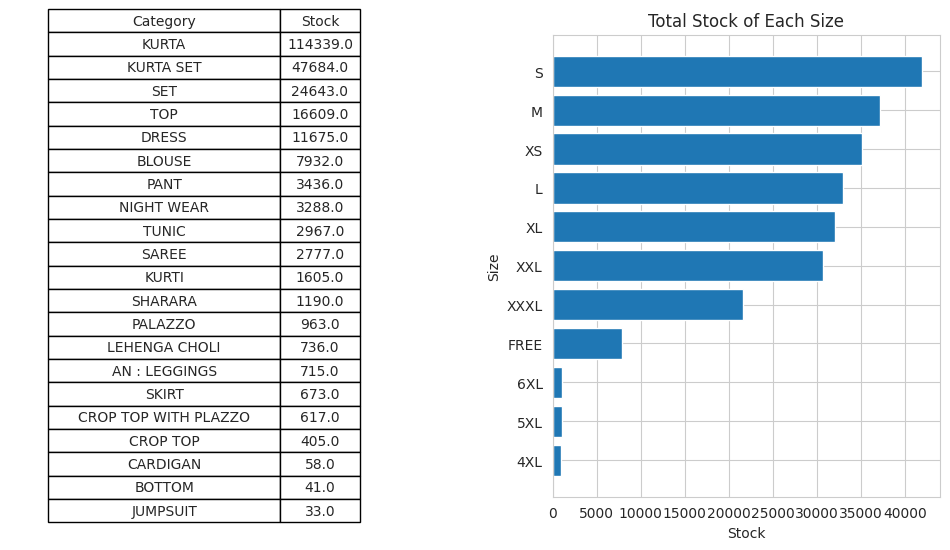

In [ ]:
size_filter = df_saleReport['Size'].isin(['S','M','XL','XXL','L','XS','XXXL','FREE','5XL','6XL','4XL'])

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

category_stock = df_saleReport[size_filter].groupby('Category')['Stock'].sum().reset_index().sort_values(by='Stock',ascending=False).reset_index(drop=True)
axs[0].axis('off')
table_data = category_stock.values.tolist()
table_data.insert(0,category_stock.columns.tolist())
table = axs[0].table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2,1.4)
table.auto_set_column_width([1,2])



size_quantity = df_saleReport[size_filter].groupby('Size')['Stock'].sum().reset_index().sort_values(by='Stock',ascending=True)
axs[1].barh(size_quantity['Size'],size_quantity['Stock'])
axs[1].set(xlabel='Stock',ylabel='Size')
axs[1].set_title('Total Stock of Each Size')


plt.subplots_adjust(wspace=0.4)
plt.show()

The "Kurta" category boasts the largest stock volume among the various categories. The "Bottoms" category has a limited stock quantity, making it suitable for a bundling promotion. Employing discount promotions to stimulate sales for items that are beginning to deplete in stock can be a strategic approach. Furthermore, in categories where stock levels remain notably high, such as "Blouses," bundling with higher-priced items like "Dresses" could be implemented. Leveraging this method to optimize sales has the potential to amplify overall transactional sales, aiming to enhance both the Average Order Value (AOV) and the company's profitability.

Moreover, it's evident that customers predominantly favor sizes "S" and "M." Consequently, the marketing team should prioritize managing inventory for items in these sizes to effectively execute bundling promotions.

### Fulfilment Analysis

As a seller, our responsibility extends beyond merely offering our products; it encompasses understanding the most efficient methods of delivery to ensure customer satisfaction throughout their shopping experience. Additionally, conducting a thorough analysis of our fulfillment processes will enable us to identify potential risks associated with each shipping method.

By adopting this approach, we can optimize our delivery mechanisms, enhance customer contentment, and mitigate potential logistical challenges. This, in turn, contributes to fostering positive brand perception and lasting customer relationships.

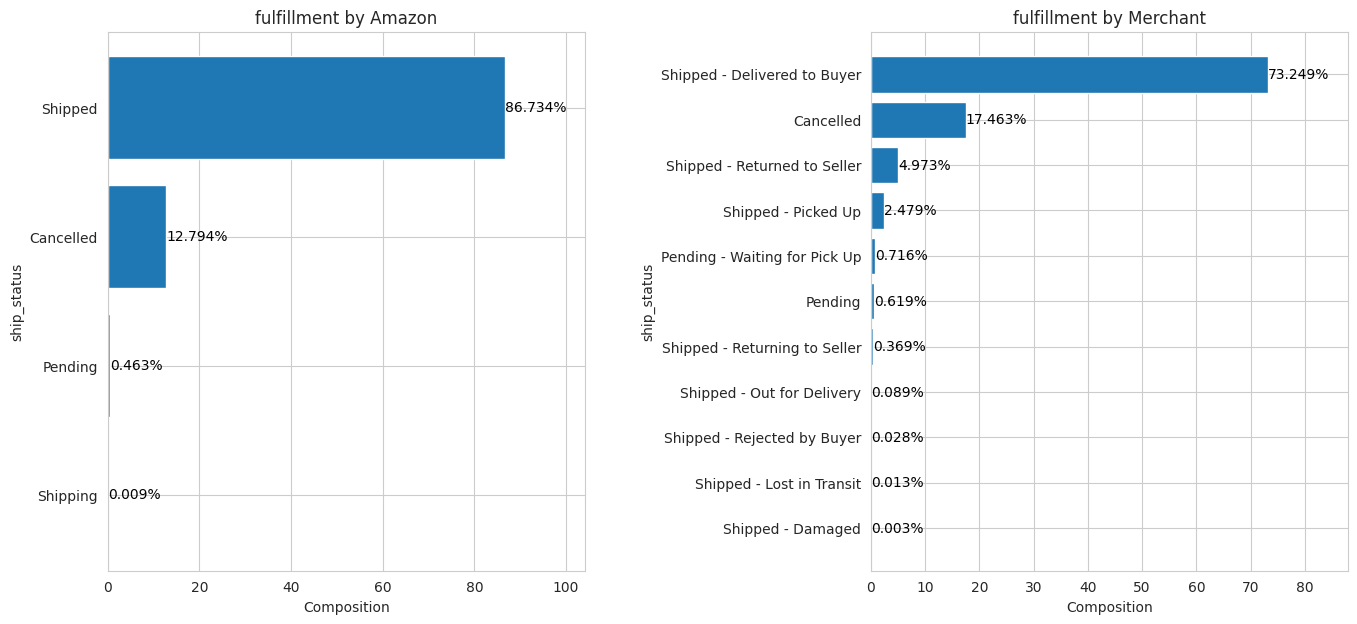

In [ ]:
amazon_fulfillment = df_amazon[df_amazon['fulfillment'] == 'Amazon']
amazon_fulfillment = amazon_fulfillment['ship_status'].value_counts().reset_index()
amazon_fulfillment = amazon_fulfillment.rename(columns={'index':'ship_status','ship_status':'order_amount'})
amazon_fulfillment['composition'] = amazon_fulfillment['order_amount']/sum(amazon_fulfillment['order_amount'])
amazon_fulfillment = amazon_fulfillment.sort_values(by='composition',ascending=True)

merchant_fulfillment = df_amazon[df_amazon['fulfillment']=='Merchant']
merchant_fulfillment = merchant_fulfillment['ship_status'].value_counts().reset_index()
merchant_fulfillment = merchant_fulfillment.rename(columns={'index':'ship_status','ship_status':'order_amount'})
merchant_fulfillment['composition'] = merchant_fulfillment['order_amount']/sum(merchant_fulfillment['order_amount'])
merchant_fulfillment = merchant_fulfillment.sort_values(by='composition',ascending=True)

def add_data_labels_and_adjust_limit(ax, bars):
    for bar in bars:
        xval = bar.get_width()
        yval = bar.get_y() + bar.get_height() / 2
        ax.text(xval, yval, f'{xval:.3f}%', va='center', ha='left', color='black', fontsize=10)
    max_xval = max([bar.get_width() for bar in bars])
    ax.set_xlim(0, max_xval * 1.2)

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(16,7))
bars1 = axs[0].barh(amazon_fulfillment['ship_status'],amazon_fulfillment['composition']*100)
axs[0].set(xlabel='Composition',ylabel='ship_status')
axs[0].set_title('fulfillment by Amazon')
add_data_labels_and_adjust_limit(axs[0],bars1)

bars2 = axs[1].barh(merchant_fulfillment['ship_status'],merchant_fulfillment['composition']*100)
axs[1].set(xlabel='Composition',ylabel='ship_status')
axs[1].set_title('fulfillment by Merchant')
add_data_labels_and_adjust_limit(axs[1],bars2)

plt.subplots_adjust(wspace=0.6)
plt.show()

Fulfilment by Amazon (FBA) boasts a higher rate of successful deliveries compared to Fulfilment by Merchant (FBM). FBM presents a range of potential issues that can arise during the shipping process, making customers more inclined to opt for stores utilizing FBA over FBM.

The risk level associated with FBA is notably lower than that of FBM. This makes FBA an appealing choice for sellers, ensuring that orders reach customers successfully without cancellations or delays.

In [ ]:
def update_promotion(promotion_text):
    if 'IN Core Free Shipping' in promotion_text:
        return 'IN Core Free Shipping'
    elif 'Amazon PLCC Free-Financing Universal Merchant' in promotion_text:
        return 'Amazon PLCC Free-Financing Universal Merchant'
    elif 'VPC' in promotion_text:
        return 'VPC Coupon'
    else:
        return promotion_text

df_amazon['promotion'] = df_amazon['promotion'].apply(update_promotion)

<Axes: >

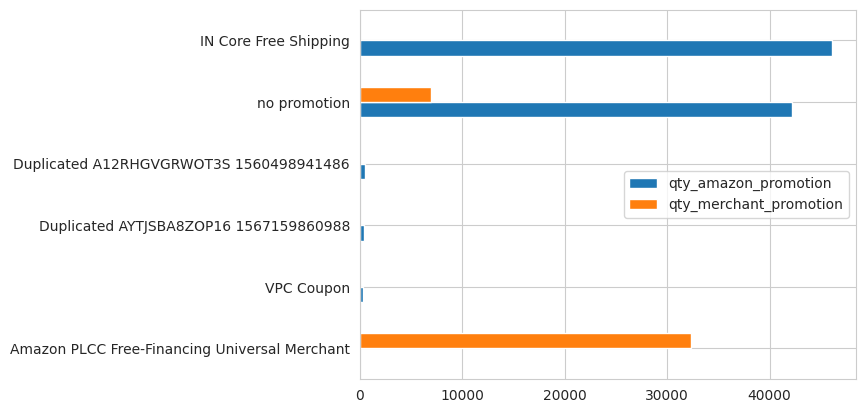

In [ ]:
amazon_promotion = df_amazon[df_amazon['fulfillment']=='Amazon']
amazon_promotion = amazon_promotion['promotion'].value_counts()


merchant_promotion = df_amazon[df_amazon['fulfillment']=='Merchant']
merchant_promotion = merchant_promotion['promotion'].value_counts()

promotion_concat = pd.concat((amazon_promotion,merchant_promotion),axis=1,keys=['qty_amazon_promotion','qty_merchant_promotion']).fillna(0)

promotion_concat.sort_values(by='qty_amazon_promotion',ascending=True).plot(kind='barh')

Consumers who opt for FBM tend to be those who make payments through credit, often leveraging Amazon PLCC Free-Financing Universal Merchant promotions. Conversely, customers who prefer FBA tend to exhibit a cash-driven shopping behavior and frequently forego the use of promotions. This distinction implies that FBA customers are generally more flexible in their shopping approach.

### Competitor Analysis

In [ ]:
columns_filter = ['MRP Old','Ajio MRP','Amazon FBA MRP','Flipkart MRP','Limeroad MRP','Myntra MRP','Paytm MRP','Snapdeal MRP']
df_price = df_may2022

def convert_number(x):
    try:
        return pd.to_numeric(x)
    except:
        return None

for column in columns_filter:
    df_price[column] = df_price[column].apply(convert_number)

df_competitor = df_price.groupby('Category')[columns_filter].mean()
df_competitor

,MRP Old,Ajio MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
Category,,,,,,,,
Gown,3151.250000,3151.250000,3151.250000,3151.250000,3151.250000,3151.250000,3151.250000,3151.250000
Kurta,1950.476309,1988.503741,2004.214464,1998.104738,1999.226933,1990.000000,1991.995012,1993.990025
Kurta Set,2741.432749,2775.660819,2762.011696,2761.625731,2759.906433,2733.201149,2759.906433,2759.906433
Nill,2422.797917,2420.603472,2427.617361,2420.603472,2420.603472,2420.603472,2420.603472,2420.603472
Tops,1728.333333,1750.555556,1750.555556,1739.444444,1728.333333,1728.555556,1728.333333,1728.333333


### Conclusion
Enhancing Sales Strategies through Comprehensive Insights:

In the pursuit of optimizing sales strategies, it's essential for sellers to embrace a holistic approach that encompasses various aspects of their business, ranging from fulfillment methods to competitor analysis. By integrating these insights, sellers can create a well-rounded approach that caters to customer preferences and market dynamics.

* Insights for Customer-Centric Growth: Examination of both weekend and weekday sales data indicates no significant patterns, necessitating innovative promotions. Customer preferences align with the "Set" category for its affordability, allowing for effective segmentation along with the "Kurta" range. Additionally, considering the "Western Dress" as a premium choice could elevate the average order value (AOV). Leveraging bundling and complimentary strategies to attract attention, particularly for the limited "Bottoms" stock, while also using bundling to boost sales and AOV. To address size preferences, focusing on inventory and bundling promotions for sizes "S" and "M" is key. Lastly, optimizing efficient delivery processes and nurturing customer trust will be pivotal in enhancing satisfaction and building lasting relationships.

* Efficient Delivery and Customer Satisfaction: Sellers should prioritize efficient delivery methods to ensure customer satisfaction. Understanding fulfillment processes and anticipating potential risks associated with different shipping methods are vital steps to providing a seamless shopping experience. This approach not only bolsters customer trust but also fosters lasting relationships.

* Fulfillment by Amazon (FBA) vs. Fulfillment by Merchant (FBM): A careful evaluation reveals that FBA is the preferred choice due to its higher success rate in deliveries compared to FBM. The inherent risks of FBM, coupled with the customer preference for reliability, emphasize the importance of adopting FBA for smoother transactions and enhanced customer satisfaction.

* Customer Segmentation and Payment Preferences: A notable distinction arises between customers favoring FBM and FBA. FBM users tend to opt for credit-based payments through promotions, while FBA customers display cash-driven behavior, often bypassing promotions. Acknowledging these nuances allows sellers to tailor their strategies and meet varying customer expectations.

* Competitor Analysis for Informed Decision-Making: Conducting a thorough competitor analysis proves invaluable for making informed decisions. By researching prices across various stores and understanding ongoing promotions, sellers can adjust their pricing and promotional strategies to remain competitive and compelling in the market.

In summary, an effective sales strategy hinges on a comprehensive understanding of customer preferences, fulfillment methods, and competitor dynamics. By synergizing these insights, sellers can create a customer-centric approach that ensures satisfaction, fosters loyalty, and positions their business for sustained growth in a competitive marketplace.

## Logistic Regresion

In [ ]:
df_logistic = df_amazon.copy()

### Analyse `order_id` Column.
* Now, we check for orderid(s) that appear in more than one row (orderids with multiple products purchased per order)

In [ ]:
# dataframe of repeated order_ID(s) - all rows
order_ID_repeat_rows = df_logistic[df_logistic["order_ID"].duplicated(keep = False)]

# count the unique repeated order_ID(s)
unique_order_ID_repeat_count = order_ID_repeat_rows["order_ID"].nunique()

# count the total number of rows in the dataset occupied by repeated orders
order_ID_repeat_rows_count = len(order_ID_repeat_rows)

# count the number of rows in the dataset occuppied by nonrepeat_order_IDs
order_ID_nonrepeat_rows = df_logistic[df_logistic["order_ID"].duplicated(keep = False) == False]
order_ID_nonrepeat_rows_count = len(order_ID_nonrepeat_rows)

print(f"1. Number of unique order_ID with multiple products per order_ID purchased: {unique_order_ID_repeat_count}\n"
         f"2. Total number of rows of these order_ID(s) with multiple products: {order_ID_repeat_rows_count}\n"
          f"3. Number of unique order_ID with single product per order_ID purchased: {order_ID_nonrepeat_rows_count}"
         )

1. Number of unique order_ID with multiple products per order_ID purchased: 6830
2. Total number of rows of these order_ID(s) with multiple products: 15407
3. Number of unique order_ID with single product per order_ID purchased: 113390


Plot a bar chart showing the proportions of these two types of orders

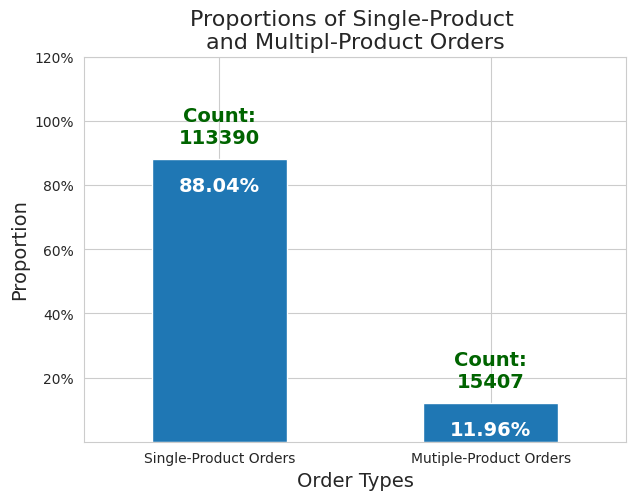

In [ ]:
fig,ax = plt.subplots(figsize = (7,5))

# calculate and store the proportion values in a pandas.Series
order_ID_repeat_rows = df_logistic[df_logistic["order_ID"].duplicated(keep = False)]
unique_order_ID_repeat_list = order_ID_repeat_rows["order_ID"].unique()
plot_dataseries = round(df_logistic["order_ID"].isin(unique_order_ID_repeat_list).
                        value_counts(normalize = True)*100,2)

# plot the bar chart
plot_dataseries.plot(kind = "bar",ax =ax)
plt.title("Proportions of Single-Product \nand Multipl-Product Orders", fontsize = 16)
plt.ylabel("Proportion", fontsize = 14)
plt.xlabel("Order Types", fontsize = 14)
plt.xticks(ticks = plot_dataseries.index,
           labels = ["Single-Product Orders", "Mutiple-Product Orders"], rotation = "horizontal")
plt.yticks(ticks = [20,40,60,80,100,120], labels = ["20%","40%","60%","80%","100%","120%"])

# create another two series with values to be diaplayed as data-label/value-label in the chart
data_label = plot_dataseries.astype(str).str.cat(np.full((2,),"%"), sep = "")
count_label = pd.Series(df_logistic["order_ID"].isin(unique_order_ID_repeat_list).value_counts()).astype("str")

# add/plot the data-label in the chart
# in percentage format
for x,y in enumerate(plot_dataseries):
    plt.text(x,y-10,data_label[x],color = "white",
             fontweight = 700,fontsize = 14, horizontalalignment = "center")

# in count values format
for x,y in enumerate(plot_dataseries):
    plt.text(x,y+5,("Count:\n"+count_label[x]),color = "Darkgreen",
             fontweight = 700,fontsize = 14, horizontalalignment = "center")
plt.show()

Observations:

* We see that 88.03% (almost 90%)of the data are from orders with single-product order.
* We are now interested in the majority and, therefore, drop the multiple-product orders.
* And, we focus our analysis on the single-product orders for prediction/classification

Actions:
* We drop the orderid(s) multiple-product orders.
* We further drop "orderid" column which is plainly not required (redundant) now.

In [ ]:
df_logistic = df_logistic[df_logistic["order_ID"].duplicated(keep = False) == False]

# drop redundant column "order_ID"
df_logistic.drop("order_ID", axis = 1, inplace = True)
df_logistic.info()

<ipython-input-37-203e9fc7d1ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logistic.drop("order_ID", axis = 1, inplace = True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 113390 entries, 0 to 128796
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 113390 non-null  datetime64[ns]
 1   ship_status          113390 non-null  object        
 2   fulfillment          113390 non-null  object        
 3   service_level        113390 non-null  object        
 4   style                113390 non-null  object        
 5   sku                  113390 non-null  object        
 6   product_category     113390 non-null  object        
 7   size                 113390 non-null  object        
 8   asin                 113390 non-null  object        
 9   courier_ship_status  113390 non-null  object        
 10  order_quantity       113390 non-null  int64         
 11  order_amount         113390 non-null  float64       
 12  city                 113390 non-null  object        
 13  state         

### Create column `rejected`
Create a column named "rejected" as the target feature with two unique values (classifications): 1 and 0 representing rejected and not-rejected respectively

* **Drop** the rows with `status` **having values unsure** of whether the orders can be assumend to be `rejected` or not
* **Add** a column `rejected` where the values are logically assumed/derived from values in column `status`.
* Then, we **drop** column `status`.

In [ ]:
# get the unique values in col "status"
df_logistic["ship_status"].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

* The `ship_status` value that can be logically assumed to be or likened to `rejection` are:

`Cancelled`, `Shipped - Returned to Seller`, `Shipped - Rejected by Buyer`, `Shipped - Returning to Seller`.

* The `ship_status` value that can be logically assumed to be or likened to `non-rejection` are:

`Shipped - Delivered to Buyer`.

* The rest are dropped

In [ ]:
# drop the rows with unsure rejection ship_status
known_value = ["Cancelled", 'Shipped - Returned to Seller','Shipped - Rejected by Buyer',
            'Shipped - Returning to Seller','Shipped - Delivered to Buyer']
df_logistic = df_logistic[df_logistic["ship_status"].isin(known_value)]

# create a col "rejected" where value 1 means rejected and 0 means not-rejected"
rejected = ["Cancelled", 'Shipped - Returned to Seller','Shipped - Rejected by Buyer',
            'Shipped - Returning to Seller']
df_logistic["rejected"] = df_logistic["ship_status"].isin(rejected).astype(int)    # change the dtype to "int"

# drop col "ship_status"
df_logistic.drop("ship_status",axis = "columns", inplace = True)

<ipython-input-39-f3f8869a83e7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logistic["rejected"] = df_logistic["ship_status"].isin(rejected).astype(int)    # change the dtype to "int"
<ipython-input-39-f3f8869a83e7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logistic.drop("ship_status",axis = "columns", inplace = True)


Plot a bar chart showing the proportions of these two types of "status"

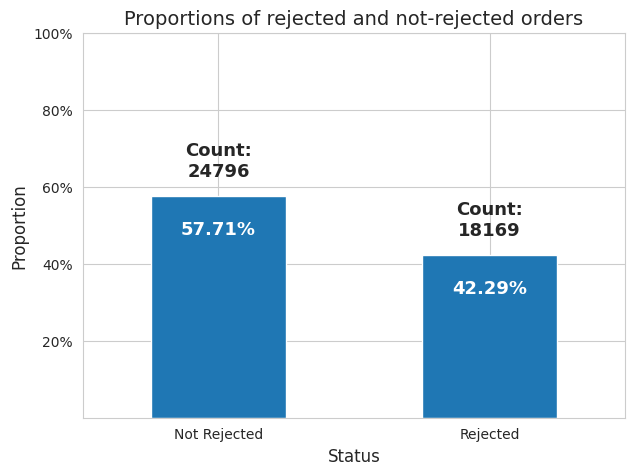

In [ ]:
# bar chart using matplotlib package
fig,ax = plt.subplots(figsize = (7,5))

# calculate and store the proportion values in a pandas.Series
plot_dataseries = round(df_logistic["rejected"].value_counts(normalize = True)*100,2)

# plot the bar chart
plot_dataseries.plot(kind = "bar",ax =ax)
plt.title("Proportions of rejected and not-rejected orders", fontsize = 14)
plt.ylabel("Proportion", fontsize = 12)
plt.xlabel("Status", fontsize = 12)
plt.xticks(ticks = range(len(plot_dataseries)),
           labels = ["Not Rejected", "Rejected"], rotation = "horizontal")
plt.yticks(ticks = [20,40,60,80,100], labels = ["20%","40%","60%","80%","100%"])

# create another series with values to be diaplayed as data-label/value-label in the chart
data_label = plot_dataseries.astype(str).str.cat(np.full((2,),"%"), sep = "")

# create one more series to to display count
data_count = df_logistic["rejected"].value_counts()

# add/plot the data-label in the chart
for x,y in enumerate(plot_dataseries):
    plt.text(x,y-10,data_label[x],color = "white",
             fontweight = 700,fontsize = 13, horizontalalignment = "center")

# add count label
for x,y in enumerate(plot_dataseries):
    plt.text(x,y+5,"Count:\n" + str(data_count[x]),fontweight = 700,
             fontsize = 13,horizontalalignment = "center")

plt.show()

**Observation**: Dataset seems to be having unbalanced class distribution aprox. 58% as not-rejected and 42% as rejected.

**Action**: We shall keep it as it is. But, we will resample later during training.

### Check for high Cardinality categorical features

Drop Unececary features

In [ ]:
df_logistic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42965 entries, 0 to 128791
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 42965 non-null  datetime64[ns]
 1   fulfillment          42965 non-null  object        
 2   service_level        42965 non-null  object        
 3   style                42965 non-null  object        
 4   sku                  42965 non-null  object        
 5   product_category     42965 non-null  object        
 6   size                 42965 non-null  object        
 7   asin                 42965 non-null  object        
 8   courier_ship_status  42965 non-null  object        
 9   order_quantity       42965 non-null  int64         
 10  order_amount         42965 non-null  float64       
 11  city                 42965 non-null  object        
 12  state                42965 non-null  object        
 13  zip                  42965 non

In [ ]:
df_logistic.drop(["date","day","month","year","promotion","courier_ship_status"],axis = 1,  inplace = True)

In [ ]:
df_logistic.select_dtypes(include = "object").nunique()

fulfillment            2
service_level          2
style               1148
sku                 5290
product_category       8
size                  11
asin                5289
city                5291
state                 60
zip                 6850
customer_type          2
dtype: int64


* Observation: Features `style`,`sku`,`shipcity`,`shippostalcode` and `asin` have high cardinality
* Action: We drop these features

In [ ]:
# drop high cardinality fetures
df_logistic.drop(["style","sku","city","zip","asin"],axis = 1, inplace = True)

### Check other features (not `object` datatype)

In [ ]:
df_logistic.select_dtypes(exclude = "object").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42965 entries, 0 to 128791
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_quantity  42965 non-null  int64  
 1   order_amount    42965 non-null  float64
 2   rejected        42965 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 MB


### Analysing feature `order_quantity`: Quantity per Order

In [ ]:
# create a pandas dataframe calculating the
# porportion (and number of occurence) of the "qty" values

# calculate the respective "proportions" of values in "qty"
qty_prop = round(df_logistic["order_quantity"].value_counts(normalize = True)*100,2)

#  rename series with "Proportion(%)", sort by index and change to dateframe
qty_prop = qty_prop.rename("Proportion(%)").sort_index().to_frame()

# rename index.name with "qty_value" and
qty_prop.index.name = "qty_value"

# add col "count"
qty_prop["Count"] = df_logistic["order_quantity"].value_counts()

# change dtype of "Proportion(%)" column and concat string "%"
qty_prop["Proportion(%)"] = (
    qty_prop["Proportion(%)"].astype(str)
    .str.cat(np.full(fill_value = "%",shape = (len(qty_prop),)))
)

qty_prop

,Proportion(%),Count
qty_value,,
0,26.45%,11365
1,73.31%,31497
2,0.21%,90
3,0.02%,8
4,0.01%,3
5,0.0%,2


Plot the above data

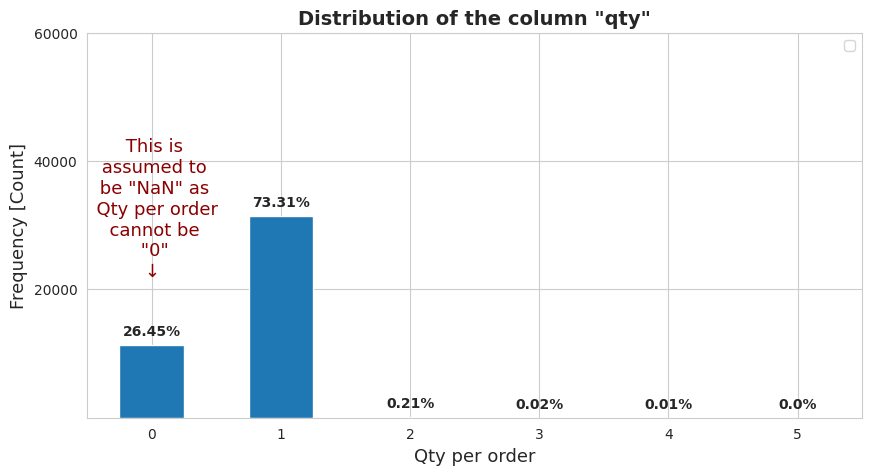

In [ ]:
# Plot distribution of Quantity per order
# Plot a figure to represent data of the above table(dataframe)
fig, ax = plt.subplots(figsize = (10,5))
qty_prop.plot(kind = "bar",y = "Count",ax = ax)
plt.xlabel("Qty per order", fontsize = 13)
plt.ylabel("Frequency [Count]",fontsize = 13)
plt.yticks(ticks = range(20000,60001,20000))
plt.title('Distribution of the column "qty"', fontsize = 14,fontweight = 550)
plt.xticks(rotation = "horizontal")
plt.legend("")
for x,y in enumerate(qty_prop["Count"]):
    qty_value = qty_prop.index[x]
    plt.text(x,y+1500,qty_prop["Proportion(%)"].loc[qty_value],
            horizontalalignment = "center",fontweight = 700)

plt.text(0,22000,' This is\n assumed to\n be "NaN" as\n  Qty per order\n  cannot be \n "0"\n↓',
         horizontalalignment = "center",color = "darkred", fontsize = 13)
plt.show()

Observations:

Feature "qty" is highly skewed (when assuming it as *continuous variable*), or
It's highly imbalanced (when assuming it as *categorical variable*)
It's logical to assume the value "0" as "NaN" (Null) because an order purchased cannot have quantity "0"
More than 99% of datapoints have value "1" or "NaN" so it may not add much information in the analysis.

Actions:

Therefore, we drop feature "qty".

In [ ]:
# drop feature "order_quantity"
df_logistic.drop("order_quantity", axis = "columns", inplace = True)
df_logistic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42965 entries, 0 to 128791
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fulfillment       42965 non-null  object 
 1   service_level     42965 non-null  object 
 2   product_category  42965 non-null  object 
 3   size              42965 non-null  object 
 4   order_amount      42965 non-null  float64
 5   state             42965 non-null  object 
 6   customer_type     42965 non-null  object 
 7   rejected          42965 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 3.0+ MB


### Analysing feature `order_amount`: Amount in Rupees.

Check the Distribution of "amount" feature

In [ ]:
# number of datapoints (rows) having value of amount = 0
amount0 = len(df_logistic[df_logistic["order_amount"] == 0])
f"The number of datapoints/orderids/rows) having amount value as 0 is:   {amount0}"

'The number of datapoints/orderids/rows) having amount value as 0 is:   7727'

It's also logical to assume the value "0" as "NaN" (Null) because an order purchased cannot have amount "0"

In [ ]:
# replace 0s with "NaN"
df_logistic["order_amount"] = df_logistic["order_amount"].replace(0,np.nan)
df_logistic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42965 entries, 0 to 128791
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fulfillment       42965 non-null  object 
 1   service_level     42965 non-null  object 
 2   product_category  42965 non-null  object 
 3   size              42965 non-null  object 
 4   order_amount      35238 non-null  float64
 5   state             42965 non-null  object 
 6   customer_type     42965 non-null  object 
 7   rejected          42965 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 3.0+ MB


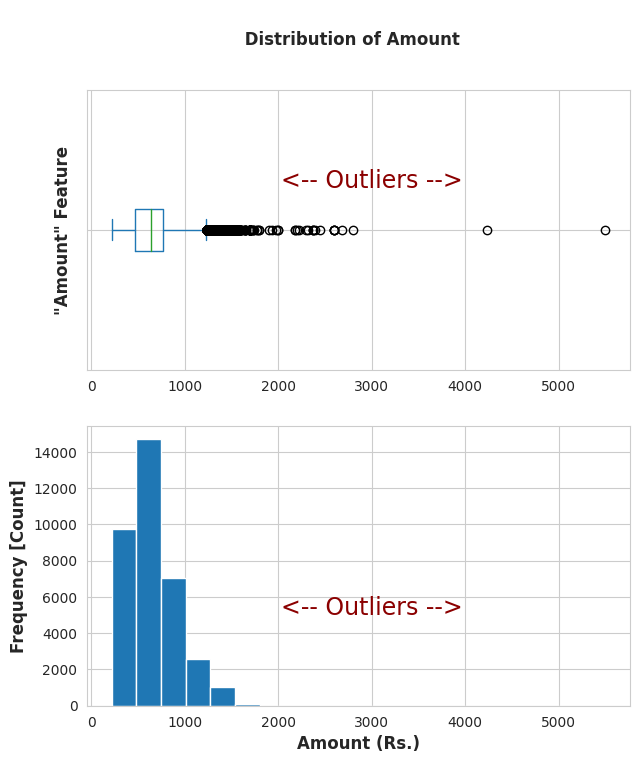

In [ ]:
# settin figure and subplots
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (7,8))

# set title for the entire figure
plt.suptitle("\n Distribution of Amount", fontweight = 600)

# code for plotting boxplot
df_logistic["order_amount"].plot(kind = "box",vert = False,ax = ax1)
ax1.text(3000, 1.15, "<-- Outliers -->", fontsize = 17,
         horizontalalignment = "center", color = "darkred")
ax1.set_ylabel('"Amount" Feature',fontsize = 12, fontweight = 600)
#ax1.set_xlabel("Amount (Rs.)\n", fontsize = 12,, fontweight = 600)
ax1.set_yticklabels(labels = "")
#ax1.legend(labels = ['Amount [Boxplot]'], fontsize = 15)

# code for plotting histogram
df_logistic["order_amount"].plot(kind = "hist",bins = 20, ax = ax2)
ax2.text(3000, 5000, "<-- Outliers -->", fontsize = 17,
         horizontalalignment = "center", color = "darkred")
ax2.set_ylabel('Frequency [Count]',fontsize = 12, fontweight = 600)
ax2.set_xlabel("Amount (Rs.)", fontsize = 12, fontweight = 600)
#ax2.legend(labels = ['Amount [Histogram]'],fontsize = 15)

plt.show()


A. Initial Observations and Actions:
Observations:  There is presence of outliers on the higher amount values.
Actions:  We explore feature "amount" again after removing 5 percentile of highest values.

In [ ]:
# create an "amount" series with no outliers (removing highest 5 percentile)
no_outlier = df_logistic["order_amount"][df_logistic["order_amount"] < df_logistic["order_amount"].quantile(0.95)]

Check the new distribution of "amount" feature

Plot boxplot and histogram

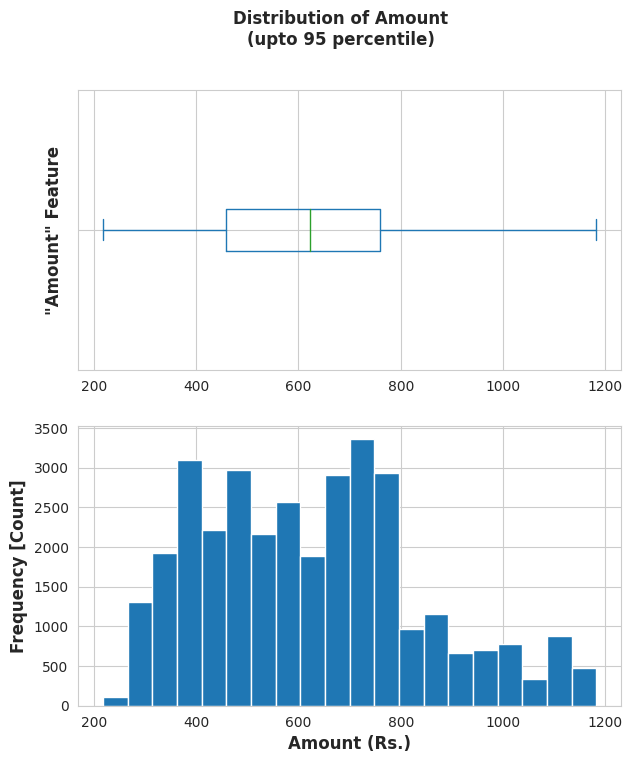

In [ ]:
# settin figure and subplots
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (7,8))

# set title for the entire figure
plt.suptitle("Distribution of Amount\n(upto 95 percentile)", fontweight = 600)

# code for plotting boxplot
no_outlier.plot(kind = "box",vert = False,ax = ax1)
ax1.set_ylabel('"Amount" Feature',fontsize = 12, fontweight = 600)
#ax1.set_xlabel("Amount (Rs.)\n", fontsize = 12,, fontweight = 600)
ax1.set_yticklabels(labels = "")
#ax1.legend(labels = ['Amount [Boxplot]'], fontsize = 15)

# code for plotting histogram
no_outlier.plot(kind = "hist",bins = 20, ax = ax2)
ax2.set_ylabel('Frequency [Count]',fontsize = 12, fontweight = 600)
ax2.set_xlabel("Amount (Rs.)", fontsize = 12, fontweight = 600)
#ax2.legend(labels = ['Amount [Histogram]'],fontsize = 15)

plt.show()

Observations:  The Distribution now looks good as it's very less skewed or it can be assumed to be closer to normal distribution than earlier.
Actions:  So, drop these outliers of the feature "amount".

In [ ]:
# remove outliers by removing highest 5 percentile of the "amount" feature
# Note: still include the rows with value "NaN"
df_logistic = df_logistic[(df_logistic["order_amount"] < df_logistic["order_amount"].quantile(0.95)) | df_logistic["order_amount"].isnull()].reset_index(drop = True)
df_logistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41107 entries, 0 to 41106
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fulfillment       41107 non-null  object 
 1   service_level     41107 non-null  object 
 2   product_category  41107 non-null  object 
 3   size              41107 non-null  object 
 4   order_amount      33380 non-null  float64
 5   state             41107 non-null  object 
 6   customer_type     41107 non-null  object 
 7   rejected          41107 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.5+ MB


###  Analyse the feature `fulfillment`

In [ ]:
# create a dataframe to check the proportion of unique value types (fulfilment_type)
df_cat = df_logistic["fulfillment"].value_counts().to_frame()
df_cat["proportion"] = round(df_logistic["fulfillment"].value_counts(normalize = True)*100,2)
df_cat["proportion"] = df_cat["proportion"].astype(str).str.cat(np.full((2,),"%"))
df_cat = (df_cat.reset_index()
          .rename(columns = {"fulfillment":"count","index":"fulfillment_type"}))
df_cat

,fulfillment_type,count,proportion
0,Merchant,31061,75.56%
1,Amazon,10046,24.44%


Observations:  Although the distribution is imbalanced it still looks good for the purpose of this analysis as the frequency (counts) values are not small.
Actions:  No action



### Analyse the feature `service_level`

In [ ]:
# create a dataframe to check the proportion of unique value types (fulfilment_type)
df_cat = df_logistic["service_level"].value_counts().to_frame()
df_cat["proportion"] = round(df_logistic["service_level"].value_counts(normalize = True)*100,2)
df_cat["proportion"] = df_cat["proportion"].astype(str).str.cat(np.full((2,),"%"))
df_cat = (df_cat.reset_index()
          .rename(columns = {"service_level":"count","index":"service_level_type"}))
df_cat

,service_level_type,count,proportion
0,Standard,31107,75.67%
1,Expedited,10000,24.33%


Observations:  Although the distribution is imbalanced it still looks good for the purpose of this analysis as the frequency (counts) values are not small.
Actions:  No action

### Analyse the feature `product_category`

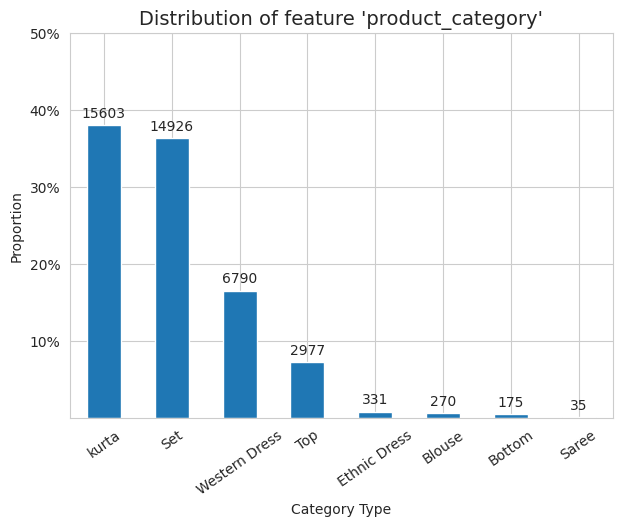

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
df_cat = df_logistic["product_category"].value_counts().to_frame()
df_cat["proportion"] = round(df_logistic["product_category"].value_counts(normalize=True) * 100, 2)
df_cat["proportion_label"] = df_cat["proportion"].astype(str).str.cat(np.full((len(df_cat),), "%"))
df_cat = (df_cat.reset_index()
          .rename(columns={"product_category": "count", "index": "category_type"}))  # Fix the column names

df_cat.plot(
    kind="bar", x="category_type", y="proportion",
    legend="", ax=ax
)
plt.xlabel("Category Type")
plt.ylabel("Proportion")
plt.title("Distribution of feature 'product_category'", fontsize=14)  # Fix the title
plt.xticks(rotation=35)
plt.yticks(ticks=range(10, 51, 10), labels=["10%", "20%", "30%", "40%", "50%"])

for x, y in enumerate(df_cat["count"]):
    plt.text(x, 1 + df_cat["proportion"][x], str(y),  # Convert y to string
             fontsize=10, horizontalalignment="center")

plt.show()

Observations:  Although the distribution is imbalanced it still looks good for the purpose of this analysis as the frequency (counts) values are not small.
Actions:  No action

### Analyse the feature `customer_type`

In [ ]:
# create a dataframe to check the proportion of unique value types (fulfilment_type)
df_cat = df_logistic["customer_type"].value_counts().to_frame()
df_cat["proportion"] = round(df_logistic["customer_type"].value_counts(normalize = True)*100,2)
df_cat["proportion"] = df_cat["proportion"].astype(str).str.cat(np.full((2,),"%"))
df_cat = (df_cat.reset_index()
          .rename(columns = {"customer_type":"count","index":"customer_type"}))
df_cat

,customer_type,count,proportion
0,customer,40877,99.44%
1,business,230,0.56%


Observations:  Although the distribution is imbalanced it still looks ok for the purpose of this analysis as the frequency (counts) values are not small.
Actions:  no action

### Analyse the feature `state`

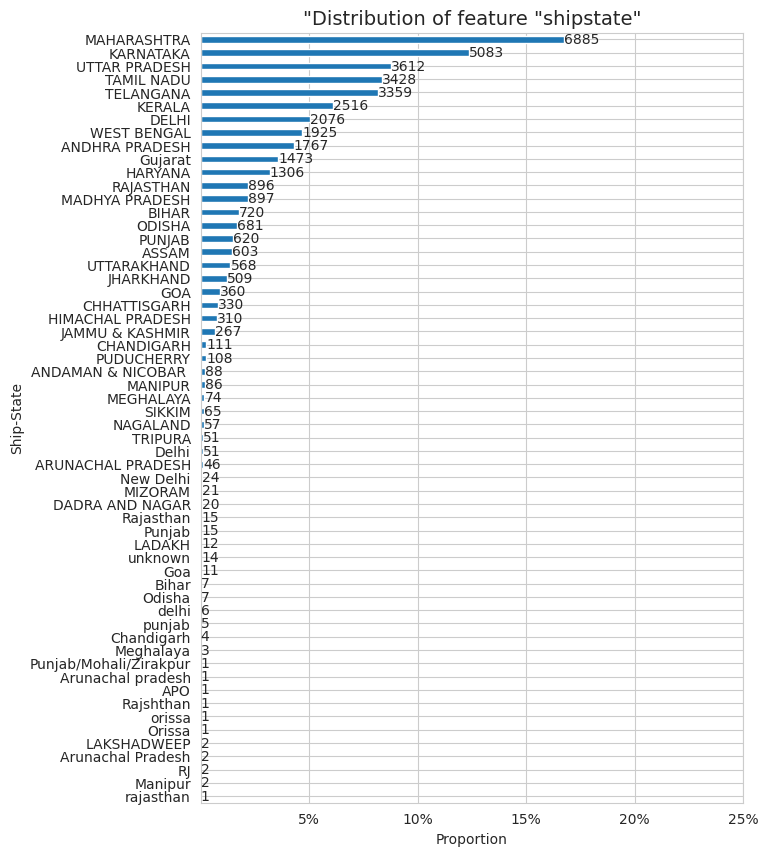

In [ ]:
# create a dataframe to check the proportion of unique value types (shipstate_type)
df_cat = df_logistic["state"].value_counts().to_frame()
df_cat["proportion"] = round(df_logistic["state"].value_counts(normalize = True)*100,2)
df_cat["proportion_str"] = df_cat["proportion"].astype(str).str.cat(np.full((len(df_cat),),"%"))
df_cat = (df_cat.reset_index()
          .rename(columns = {"state":"count","index":"state_type"}))

df_cat = df_cat.sort_values(by = "proportion").reset_index(drop = True)
fig,ax = plt.subplots(figsize = (7,10))

df_cat.plot(
    kind = "barh", x = "state_type",y = "proportion",
    legend = "", ax = ax
)
plt.ylabel("Ship-State")
plt.xlabel("Proportion")
plt.title('"Distribution of feature "shipstate"', fontsize = 14)
plt.yticks(ticks = list(range(0,len(df_cat))) ,labels=df_cat["state_type"],
          fontsize = 10)
plt.xticks(ticks = range(5,26,5) ,labels =["5%","10%","15%","20%","25%"])

for x,y in enumerate(df_cat["count"]):
    plt.text((df_cat["proportion"][x]),x,y,
             fontsize = 10, verticalalignment = "center")
plt.show()

Initial Observatins and Actions

Observations:

* The distribution is imbalanced.
* The frequency (counts) values of the North-Eastern States and Union
* Territories and "UNKNOWN" states are very small.

Actions:

* Therefore we create a feature "region" re-categorise these states to regions of Inida base on geographical Directions: "norteastindia","northindia","southindia","eastindia","westindia" and "centralindia".
* We also drop the "UNKNOWN" that has only 15 counts.

Change the data to capital to make it easier to change the data

In [ ]:
df_logistic["state"] = df_logistic["state"].str.upper()
df_logistic["state"].replace({"PONDICHERRY":"PUDUCHERRY","RAJSHTHAN":"RAJASTHAN","RAJSTHAN":"RAJASTHAN",
                              "RJ":"RAJASTHAN","PB":"PUNJAB","PUNJAB/MOHALI/ZIRAKPUR":"PUNJAB",
                              "ORISSA":"ODISHA","DELHI":"NEW DELHI","NL":"UNKNOWN","APO":"UNKNOWN",
                              "AR":"UNKNOWN"}, inplace = True)

In [ ]:
# Add a col named "regions" based on the geographical location of states
df_logistic["region"] = df_logistic["state"].replace({
    "MAHARASHTRA":"westindia","KARNATAKA":"southindia",
    'PUDUCHERRY':"southindia",'TELANGANA':"southindia",
    'ANDHRA PRADESH':"southindia", 'HARYANA':"northindia",
    'JHARKHAND':"eastindia", 'CHHATTISGARH':"eastindia",
    'ASSAM':"northeastindia",'ODISHA':"eastindia",
    'UTTAR PRADESH':"northindia", 'GUJARAT':"westindia",
    'TAMIL NADU':"southindia", 'UTTARAKHAND':"northindia",
    'WEST BENGAL':"eastindia", 'RAJASTHAN':"westindia",
    'NEW DELHI':"centralindia",'MADHYA PRADESH':"centralindia",
    'KERALA':"southindia", 'JAMMU & KASHMIR':"northindia",
    'BIHAR':"eastindia",'MEGHALAYA':"northeastindia",
    'PUNJAB':"northindia", 'GOA':"southindia",
    'TRIPURA':"northeastindia", 'CHANDIGARH':"northindia",
    'HIMACHAL PRADESH':"northindia",'SIKKIM':"northeastindia",
    "ANDAMAN & NICOBAR ":"eastindia", 'MANIPUR':"northeastindia",
    'MIZORAM':"northeastindia",'NAGALAND':"northeastindia",
    'ARUNACHAL PRADESH':"northeastindia", 'LADAKH':"northindia",
    'DADRA AND NAGAR':"westindia",'LAKSHADWEEP':"southindia"
})

# rows with "UNKNOWN" states
df_logistic = df_logistic[df_logistic["state"] != "UNKNOWN"]

Plot barcharts of the feature "region"

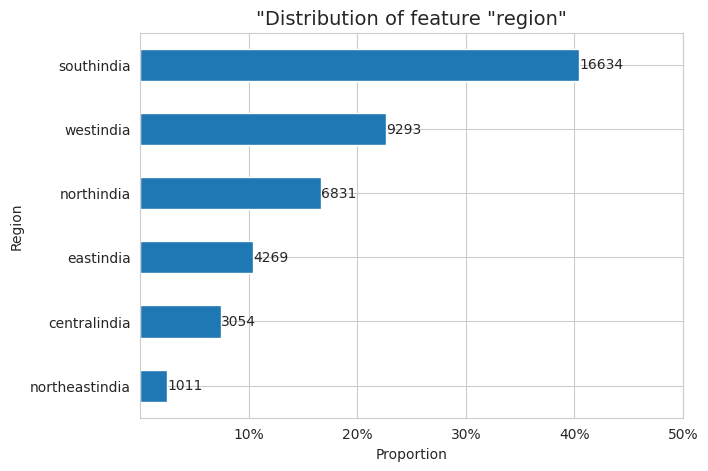

In [ ]:
# create a dataframe to check the proportion of unique value types (shipstate_type)
df_cat = df_logistic["region"].value_counts().to_frame()
df_cat["proportion"] = round(df_logistic["region"].value_counts(normalize = True)*100,2)
df_cat["proportion_str"] = df_cat["proportion"].astype(str).str.cat(np.full((len(df_cat),),"%"))
df_cat = (df_cat.reset_index()
          .rename(columns = {"region":"count","index":"region_name"}))

df_cat = df_cat.sort_values(by = "proportion").reset_index(drop = True)
fig,ax = plt.subplots(figsize = (7,5))

df_cat.plot(
    kind = "barh", x = "region_name",y = "proportion",
    legend = "", ax = ax
)
plt.ylabel("Region")
plt.xlabel("Proportion")
plt.title('"Distribution of feature "region"', fontsize = 14)
plt.yticks(ticks = list(range(0,len(df_cat))) ,labels=df_cat["region_name"])
plt.xticks(ticks = range(10,51,10) ,labels =["10%","20%","30%","40%","50%"])

for x,y in enumerate(df_cat["count"]):
    plt.text((df_cat["proportion"][x]),x,y,
             fontsize = 10, verticalalignment = "center")
plt.show()

Final Observations and Actions

Observations:

* The distribution is still imbalanced.
* But, regions of lower values frequency (counts) are not so small.

Actions:

* Drop feature "shipstate" as it will be relaced by new feature "region"

In [ ]:
# drop the feature "shipstate"
df_logistic.drop("state",axis = "columns", inplace = True)

#reset index
df_logistic = df_logistic.reset_index(drop = True)
df_logistic.info()
df_logistic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41092 entries, 0 to 41091
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fulfillment       41092 non-null  object 
 1   service_level     41092 non-null  object 
 2   product_category  41092 non-null  object 
 3   size              41092 non-null  object 
 4   order_amount      33368 non-null  float64
 5   customer_type     41092 non-null  object 
 6   rejected          41092 non-null  int64  
 7   region            41092 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.5+ MB


,fulfillment,service_level,product_category,size,order_amount,customer_type,rejected,region
0,Merchant,Standard,Set,S,647.62,customer,1,westindia
1,Merchant,Standard,kurta,3XL,406.00,customer,0,southindia
2,Merchant,Standard,Western Dress,L,753.33,customer,1,southindia
3,Merchant,Standard,kurta,S,399.00,customer,0,southindia
4,Amazon,Expedited,Set,3XL,NaN,customer,1,southindia


## DATA PREPROCESSING

### Split the dataset
* Split the Dataset into target vector and feature matrix.
* Split the target vector and feature matrix into corresponding training and test datasets for training and testing (final validation) models.

#### Split the Dataset into target vector and feature matrix.

In [ ]:
df = df_logistic.copy()

In [ ]:
target = "rejected"
y = df[target]     # target vector
X = df.drop(target, axis = "columns")   # feature matrix/dataframe

#display target vector and feature matrix
print("Target Vector:")
display(y.head())
print("\nThe feature matrix:")
display(X.head())

Target Vector:


0    1
1    0
2    1
3    0
4    1
Name: rejected, dtype: int64


The feature matrix:


,fulfillment,service_level,product_category,size,order_amount,customer_type,region
0,Merchant,Standard,Set,S,647.62,customer,westindia
1,Merchant,Standard,kurta,3XL,406.00,customer,southindia
2,Merchant,Standard,Western Dress,L,753.33,customer,southindia
3,Merchant,Standard,kurta,S,399.00,customer,southindia
4,Amazon,Expedited,Set,3XL,NaN,customer,southindia


#### Split the target vector and feature matrix into corresponding training and test datasets for training and testing (final validation) models.

In [ ]:
# split the datasets into training and test datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state = 42)

# print the shape of the training and testing datasets
print(f"Shape of X_train :{X_train.shape}\nShape of X_test: {X_test.shape}",
      f"\nShape of y_train: {y_train.shape}\nShape of y_test: {y_test.shape}")

Shape of X_train :(32873, 7)
Shape of X_test: (8219, 7) 
Shape of y_train: (32873,)
Shape of y_test: (8219,)


### Addressing imbalanced class dristribution.
* Check for imbalance in the target class distribution in the training-target vector
* Resample the training datasets to obtain balanced target class distribution.

#### Check for imbalance in the target class distribution in the training-target vector

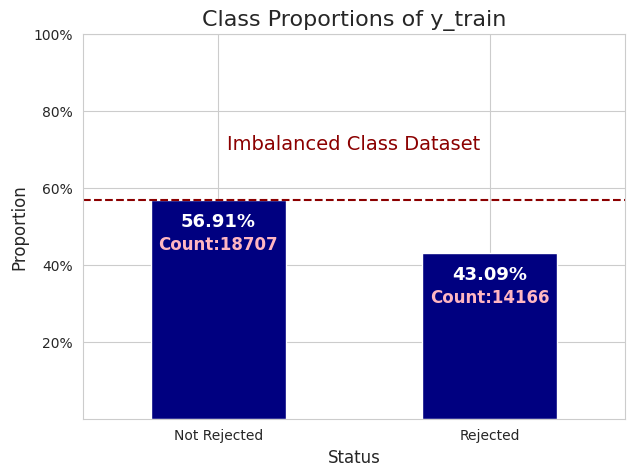

In [ ]:
# bar chvalue_countsg matplotlib package
fig,ax = plt.subplots(figsize = (7,5))

# calculate and store the proportion values in y_train series
plot_dataseries = round(y_train.value_counts(normalize = True)*100,2)

# plot the bar chart
plot_dataseries.plot(kind = "bar",ax =ax, color = "navy")
plt.text(0.5,70,"Imbalanced Class Dataset",color = "darkred",
         horizontalalignment = "center",fontsize = 14)
plt.axhline(y = plot_dataseries[0],color = "darkred", linestyle = "--")
plt.title("Class Proportions of y_train", fontsize = 16)
plt.ylabel("Proportion", fontsize = 12)
plt.xlabel("Status", fontsize = 12)
plt.xticks(ticks = range(len(plot_dataseries)),
           labels = ["Not Rejected", "Rejected"], rotation = "horizontal")
plt.yticks(ticks = [20,40,60,80,100], labels = ["20%","40%","60%","80%","100%"])

# create another series with values to be diaplayed as data-label/value-label in the chart
data_label = plot_dataseries.astype(str).str.cat(np.full((2,),"%"), sep = "")

# add/plot the data-label (in%) in the chart
for x,y in enumerate(plot_dataseries):
    plt.text(x,y-7,data_label[x],color = "white",
             fontweight = 700,fontsize = 13, horizontalalignment = "center")

# add/plot the data-label (in count) in the chart
for x,y in enumerate(y_train.value_counts()):
    plt.text(x,plot_dataseries[x]- 13,f"Count:{y_train.value_counts()[x]}",
             horizontalalignment = "center", color = "lightpink",fontsize = 12, fontweight = 700)


plt.show()

#### Resample the training datasets to obtain balanced target class distribution.

In [ ]:
ros = RandomOverSampler(random_state = 42)
X_train_over,y_train_over = ros.fit_resample(X_train,y_train)

# print the shape of the training and testing datasets
print(f"Shape of X_train_over :{X_train_over.shape}",
      f"\nShape of y_train_over: {y_train_over.shape}")

Shape of X_train_over :(37414, 7) 
Shape of y_train_over: (37414,)


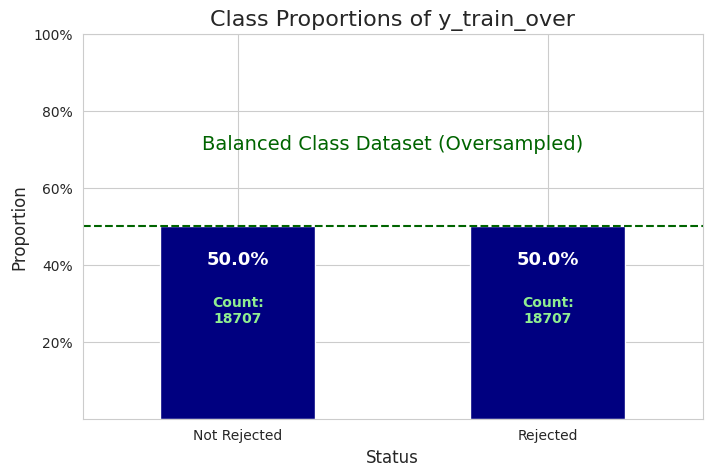

In [ ]:
# plot bar chart using matplotlib package
fig,ax = plt.subplots(figsize = (8,5))

# calculate and store the proportion values in a y_train_over
plot_dataseries = round(y_train_over.value_counts(normalize = True)*100,2)

# plot the bar chart
plot_dataseries.plot(kind = "bar",ax =ax, color = "navy")
plt.text(0.5,70,"Balanced Class Dataset (Oversampled)",color = "darkgreen",
         horizontalalignment = "center",fontsize = 14)
plt.axhline(y = plot_dataseries[0],color = "darkgreen", linestyle = "--")
plt.title("Class Proportions of y_train_over", fontsize = 16)
plt.ylabel("Proportion", fontsize = 12)
plt.xlabel("Status", fontsize = 12)
plt.xticks(ticks = range(len(plot_dataseries)),
           labels = ["Not Rejected", "Rejected"], rotation = "horizontal")
plt.yticks(ticks = [20,40,60,80,100], labels = ["20%","40%","60%","80%","100%"])

# create another series with values to be diaplayed as data-label/value-label in the chart
data_label = plot_dataseries.astype(str).str.cat(np.full((2,),"%"), sep = "")

# add/plot the data-label in the chart
for x,y in enumerate(plot_dataseries):
    plt.text(x,y-10,data_label[x],color = "white",
             fontweight = 700,fontsize = 13, horizontalalignment = "center")

# add/plot the data-label (in count) in the chart
for x,y in enumerate(y_train_over.value_counts()):
    plt.text(x,plot_dataseries[x]- 25,f"Count:\n{y_train_over.value_counts()[x]}",
             horizontalalignment = "center", color = "lightgreen", fontweight = 700)

plt.show()

### Data Transformation.
* Create a pipeline for transforming the numeric feature.
* Create a pipeline for transforming the categorical features.
* Create a column transformer object to enclose both the transformers so they could execute in parallel.

#### Create a pipeline for transforming the numeric feature.

In [ ]:
# create a pipeline with steps as simpleimputer and minmaxscaler
num_transformer = make_pipeline(SimpleImputer(),MinMaxScaler())
num_transformer

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler())])

 #### Create a pipeline for transforming the categorical features.

In [ ]:
cat_transformer = make_pipeline(SimpleImputer(strategy = "most_frequent"),OneHotEncoder(drop = "first"))
cat_transformer

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(drop='first'))])

#### Create a column transformer object to transform both the numeric and categorical features in parallel.

In [ ]:
# create a columntransformer with num_transformer and
# cat_transformer as its elements
col_transformer = ColumnTransformer(
    [
        ("numtransformer",num_transformer,
         X_train_over.select_dtypes(exclude = "object").columns),
        ("cattransformer",cat_transformer,X_train_over.select_dtypes(include = "object").columns)
    ]
)
col_transformer

ColumnTransformer(transformers=[('numtransformer',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 Index(['order_amount'], dtype='object')),
                                ('cattransformer',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'))]),
                                 Index(['fulfillment', 'service_level', 'product_category', 'size',
       'customer_type', 'region'],
      dtype='object'))])

## CLASSIFICATION MODELS FOR PREDICTION
We shall make classification prediction using three models based on:
* Logistic Regression Classifier
* Random Forest classifier

The idea is to evaluate performances of both the predictors and also, look for similarities among them with regard to important features

### Logistic Regression Classifier
* Define an instance of logistic regression estimator using pipeline and fit the model.

In [ ]:
# define an instance for logistic regression estimator using pipeline
logistic_model = make_pipeline(
    col_transformer,
    LogisticRegression(random_state = 42, max_iter = 1000)
)

# fit the model on resampled training datasets
logistic_model.fit(X_train_over,y_train_over)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numtransformer',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  Index(['order_amount'], dtype='object')),
                                                 ('cattransformer',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['fulfillment', 'service_level', 'product_category', 'size',
       'customer_type', 'region'],
      dtype='object'))])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

#### Prediction and Performance - TRAINING DATASET

* Prediction with, and performance of, Logistic Regression Classifier of the Training Dataset

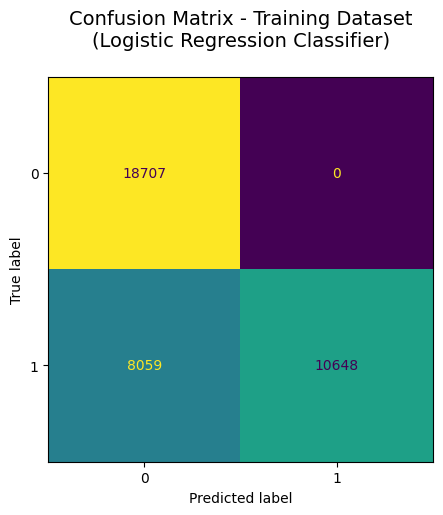

ACCURACY SCORE (Training) : 78.46%
PRECISION SCORE (Training):  100.0 %
RECALL SCORE (Training):  56.92 %


In [ ]:
# predict the target from X_train_over features
y_train_over_pred_lr = logistic_model.predict(X_train_over)
confusion_train_lr = confusion_matrix(y_train_over,y_train_over_pred_lr)

# plot Confusion matrix
# set display back to matplotlib
sns.reset_orig()

fig,ax = plt.subplots(figsize = (5,5))
ConfusionMatrixDisplay.from_estimator(logistic_model,X_train_over,y_train_over,
                                      ax = ax, colorbar=False)
                        # (OR)
# ConfusionMatrixDisplay.from_predictions(y_train_over,y_train_over_pred_lr,
#                                        ax = ax, colorbar=False)
plt.title("Confusion Matrix - Training Dataset\n(Logistic Regression Classifier)\n",
         fontsize = 14)
plt.show()

# Accuracy
accuracy_train_lr = round(logistic_model.score(X_train_over,y_train_over)*100,2)
print(f"ACCURACY SCORE (Training) : {accuracy_train_lr}%")

# Precision
precision_train_lr = round(confusion_train_lr[1,1]/(confusion_train_lr[1,1]+confusion_train_lr[0,1])*100,2)
print("PRECISION SCORE (Training): ",precision_train_lr,"%")

# Recall
recall_train_lr = round(confusion_train_lr[1,1]/(confusion_train_lr[1,1]+confusion_train_lr[1,0])*100,2)
print("RECALL SCORE (Training): ",recall_train_lr,"%")

# setting seaborn display again (to be applied after this cell execution)
sns.set()

#### Prediction and Performance - TEST DATASET

* Prediction with, and performance of, Logistic Regression Classifier of the Test Dataset

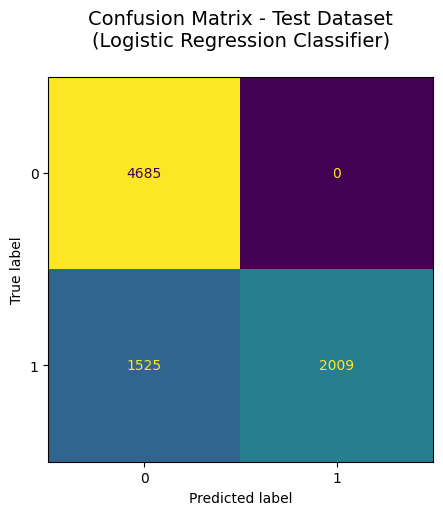

ACCURACY SCORE (Test) : 81.45%
PRECISION SCORE (Test):  100.0 %
RECALL SCORE (Test):  56.85 %


In [ ]:
# predict the target from X_train_over features
y_test_pred_lr = logistic_model.predict(X_test)
confusion_test_lr = confusion_matrix(y_test,y_test_pred_lr)

# plot Confusion matrix
# set display back to matplotlib
sns.reset_orig()

fig,ax = plt.subplots(figsize = (5,5))
ConfusionMatrixDisplay.from_estimator(logistic_model,X_test,y_test,
                                      ax = ax, colorbar=False)
                        # (OR)
# ConfusionMatrixDisplay.from_predictions(y_train_over,y_train_over_pred,
#                                        ax = ax, colorbar=False)
plt.title("Confusion Matrix - Test Dataset\n(Logistic Regression Classifier)\n",
         fontsize = 14)
plt.show()

# Accuracy
accuracy_test_lr = round(logistic_model.score(X_test,y_test)*100,2)
print(f"ACCURACY SCORE (Test) : {accuracy_test_lr}%")

# Precision
precision_test_lr = round(confusion_test_lr[1,1]/(confusion_test_lr[1,1]+confusion_test_lr[0,1])*100,2)
print("PRECISION SCORE (Test): ",precision_test_lr,"%")

# Recall
recall_test_lr = round(confusion_test_lr[1,1]/(confusion_test_lr[1,1]+confusion_test_lr[1,0])*100,2)
print("RECALL SCORE (Test): ",recall_test_lr,"%")

# setting seaborn display again (to be applied after this cell execution)
sns.set()

#### ROC Curve of Prediction with Logistic Regression - TEST DATASET

* TEST DATASET - Receiver Operating Characteristic (ROC) Curve of the prediction of Logistic Regression Classifier

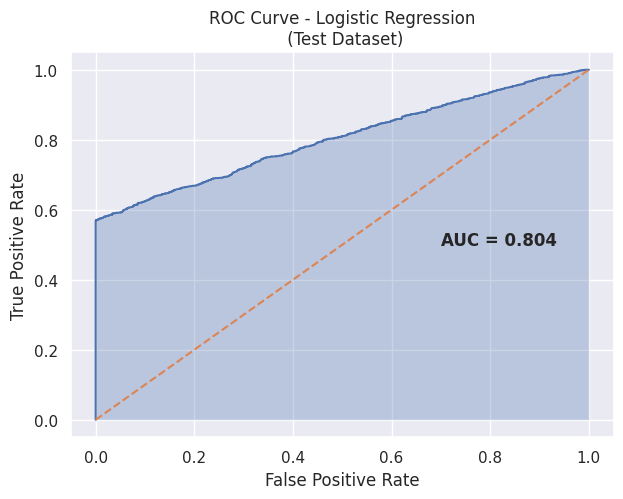

In [ ]:
# Calculete the falsepositiverate(fpr), truepositiverate(tpr) for
# various thresholds
fpr_lr,tpr_lr,thresh_lr = roc_curve(y_test,
                           logistic_model.predict_proba(X_test)[:,1],
                           pos_label = 1)
# calculate the auc score
auc_lr = roc_auc_score(y_test,logistic_model.predict_proba(X_test)[:,1])

# plot the curve
fig, ax = plt.subplots(figsize = (7,5))
plt.plot(fpr_lr,tpr_lr)
plt.plot([0,1],[0,1], linestyle = "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression\n (Test Dataset)")
plt.fill_between(fpr_lr,tpr_lr, alpha = 0.3)
plt.text(0.7,0.5,f"AUC = {round(auc_lr,3)}",fontweight = 700)
plt.show()

#### Feature Importance

* Top 10 features impacting the decision on order-rejection based on logistic regression classifier

In [ ]:
# create pandas series of weights(coefficients) as feature importance
# and feature names as index

# coefficients/weights list
weights_list = logistic_model.named_steps["logisticregression"].coef_.reshape(-1,)

# features list
features_list_lr = list(logistic_model["columntransformer"].transformers_[1][1]["onehotencoder"]
                 .get_feature_names_out())
features_list_lr.insert(0,"amount")

#create the pandas series
feature_importances_lr = pd.Series(weights_list,index = features_list_lr)

# sort values based on weights
feature_importances_lr = feature_importances_lr.sort_values(key = abs)

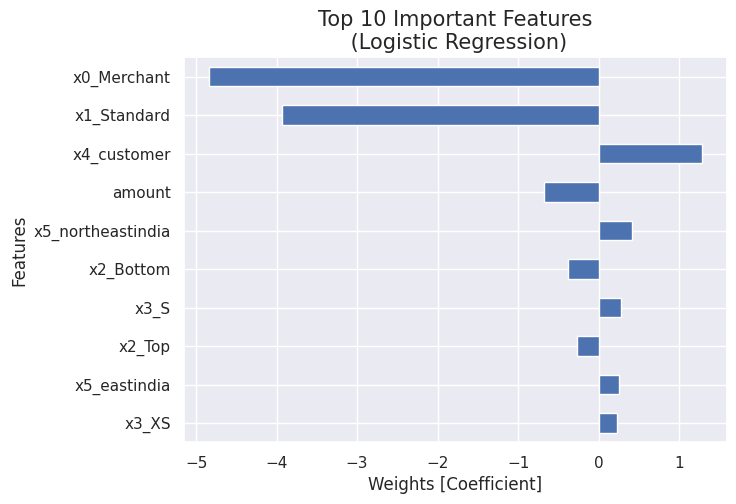

In [ ]:
# plot top 10 select_dtypesbottom 10 important features
fig, ax = plt.subplots(figsize = (7,5))
#plt.subplots_adjust(hspace = 0.5)
plt.title("Top 10 Important Features\n (Logistic Regression)", fontsize= 15)
feature_importances_lr.tail(10).plot(kind = "barh", ax = ax)
plt.xlabel("Weights [Coefficient]",fontsize = 12)
plt.ylabel("Features", fontsize = 12)
plt.show()

### Random Forest Classifier
Instance; Hyperparameter Tuning; Model Fitting

* Define an instance of random forest estimator using pipeline,
* Set the parameters range for hyperparameter tunning to identify the best parameters for estimation, and
* Create an instance of GridSearchCV() (model) and fit the classification model to find the best estimator.

In [ ]:
# define an instance of random forest estimator using pipeline
rf_estimator = make_pipeline(
    col_transformer,RandomForestClassifier(random_state = 42)
)

# Set the parameters ranges for hyperparameter tunning
params_rf = {
    "randomforestclassifier__max_depth":range(10,31,2), #  chosen this range to avoid overfitting
    "randomforestclassifier__n_estimators": range(10,101,10)
}

# create an instance of GridSearchCV (model) and then fit the model.
clf_rf = GridSearchCV(rf_estimator,cv = 6,param_grid = params_rf,n_jobs = -1, verbose = 1)
clf_rf.fit(X_train_over,y_train_over)

Fitting 6 folds for each of 110 candidates, totalling 660 fits


GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numtransformer',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['order_amount'], dtype='object')),
                                                                        ('cattransformer',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         Index(['fulfillment', 'service_level', 'product_category', 'size',
       'customer_type', 'region'],
      dtype='object'))])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 31, 2),
                         'randomforestclassifier__n_estimators': range(10, 101, 10)},
             verbose=1)

In [ ]:
# Best parameter for best estimator
# read the best_params_ values into dataframe
best_parameter_rf = pd.DataFrame.from_dict(clf_rf.best_params_,orient = "index")

# rename the index
best_parameter_rf.index = [element[1] for element in best_parameter_rf.index.str.rsplit("__",1,expand = True)]

# rename the column
best_parameter_rf.rename(columns = {0:"best_parameter_value"}, inplace=True)

# display the best_parameter dataframe
best_parameter_rf

<ipython-input-91-b151327536e0>:6: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  best_parameter_rf.index = [element[1] for element in best_parameter_rf.index.str.rsplit("__",1,expand = True)]


,best_parameter_value
max_depth,30
n_estimators,100


#### Prediction and Performance - TRAINING DATASET

* Prediction with, and performance of, Random Forest Classifier of the Training Dataset

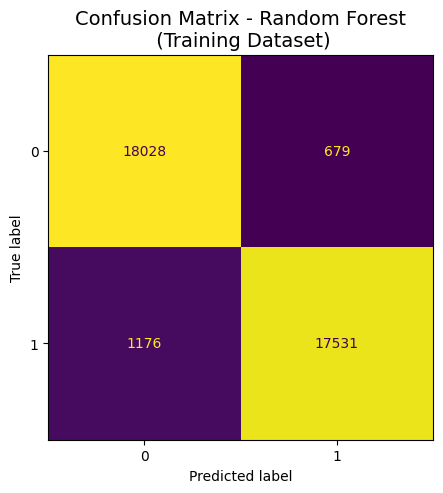

ACCURACY SCORE (Training): 87.23%
PRECISION SCORE (Training):  96.27 %
RECALL SCORE (Training):  93.71 %


In [ ]:
# predict the target from X_train_over features
y_train_over_pred_rf = clf_rf.predict(X_train_over)
confusion_train_rf = confusion_matrix(y_train_over,y_train_over_pred_rf)

# plot Confusion matrix
# set display back to matplotlib
sns.reset_orig()

fig,ax = plt.subplots(figsize = (7,5))
ConfusionMatrixDisplay.from_estimator(clf_rf,X_train_over,y_train_over,
                                      ax = ax, colorbar=False)
                        # (OR)
# ConfusionMatrixDisplay.from_predictions(y_train_over,y_train_over_pred,
#                                        ax = ax, colorbar=False)
plt.title("Confusion Matrix - Random Forest\n (Training Dataset)",
         fontsize = 14)
plt.show()

# Accuracy
accuracy_train_rf = round(clf_rf.best_score_*100,2)
print(f"ACCURACY SCORE (Training): {accuracy_train_rf}%")

# Precision
precision_train_rf = round(confusion_train_rf[1,1]/(confusion_train_rf[1,1]+confusion_train_rf[0,1])*100,2)
print("PRECISION SCORE (Training): ",precision_train_rf,"%")

# Recall
recall_train_rf = round(confusion_train_rf[1,1]/(confusion_train_rf[1,1]+confusion_train_rf[1,0])*100,2)
print("RECALL SCORE (Training): ",recall_train_rf,"%")

# setting seaborn display again (to be applied after this cell execution)
sns.set()

#### Prediction and Performance - TEST DATASET

* Prediction with, and performance of, Random Forest Classifier of the Test Dataset

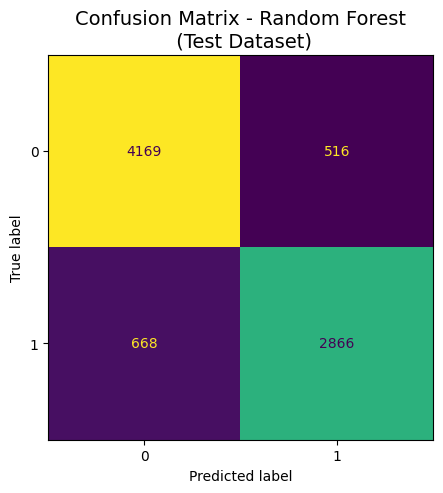

ACCURACY SCORE (Test): 85.59%
PRECISION SCORE (Test):  84.74 %
RECALL (Test):  81.1 %


In [ ]:
# predict the target from X_train_over features
y_test_pred_rf = clf_rf.predict(X_test)
confusion_test_rf = confusion_matrix(y_test,y_test_pred_rf)

# plot Confusion matrix
# set display back to matplotlib
sns.reset_orig()

fig,ax = plt.subplots(figsize = (5,5))
ConfusionMatrixDisplay.from_estimator(clf_rf,X_test,y_test,
                                      ax = ax, colorbar=False)
                        # (OR)
#ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred_rf,
#                                        ax = ax, colorbar=False)
plt.title("Confusion Matrix - Random Forest\n (Test Dataset)",
         fontsize = 14)
plt.show()

# Accuracy
accuracy_test_rf = round(clf_rf.score(X_test,y_test)*100,2)
print(f"ACCURACY SCORE (Test): {accuracy_test_rf}%")

# Precision
precision_test_rf =  round(confusion_test_rf[1,1]/(confusion_test_rf[1,1]+confusion_test_rf[0,1])*100,2)
print("PRECISION SCORE (Test): ",precision_test_rf,"%")

# Recall
recall_test_rf = round(confusion_test_rf[1,1]/(confusion_test_rf[1,1]+confusion_test_rf[1,0])*100,2)
print("RECALL (Test): ",recall_test_rf,"%")

# setting seaborn display again (to be applied after this cell execution)
sns.set()

#### ROC Curve of Prediction with Logistic Regression - TEST DATASET

* TEST DATASET - Receiver Operating Characteristic (ROC) Curve of the prediction of Random Forest Classifier

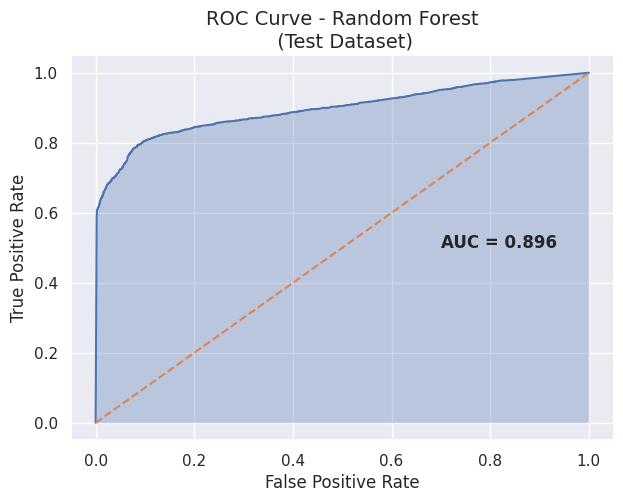

In [ ]:
# Calculete the falsepositiverate(fpr), truepositiverate(tpr) for
# various thresholds
fpr_rf,tpr_rf,thresh_rf = roc_curve(y_test,
                           clf_rf.predict_proba(X_test)[:,1],
                           pos_label = 1)
# calculate the auc score
auc_rf = roc_auc_score(y_test,clf_rf.predict_proba(X_test)[:,1])

# plot the curve
fig,ax = plt.subplots(figsize = (7,5))
plt.plot(fpr_rf,tpr_rf)
plt.plot([0,1],[0,1], linestyle = "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest\n (Test Dataset)",fontsize = 14)
plt.fill_between(fpr_rf,tpr_rf, alpha = 0.3)
plt.text(0.7,0.5,f"AUC = {round(auc_rf,3)}", fontweight = 700)
plt.show()

#### Feature Importance

* Top 10 features impacting the decision on order-rejection based on random forest classifier.

In [ ]:
# create pandas series of feature importance
# and feature names as index

# Degree of feature importance list
feature_importances_rf = (
    clf_rf.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
)

# feature names to be assigned as index
feature_list_rf = list(
    (
        clf_rf.best_estimator_.named_steps["columntransformer"]
        .transformers_[1][1].named_steps["onehotencoder"].get_feature_names_out()
    )
)
feature_list_rf.insert(0,"amount")

# create feature importance pandas series
feature_importances_rf = pd.Series(feature_importances_rf,index = feature_list_rf)

# sort values
feature_importances_rf = feature_importances_rf.sort_values(key = abs)

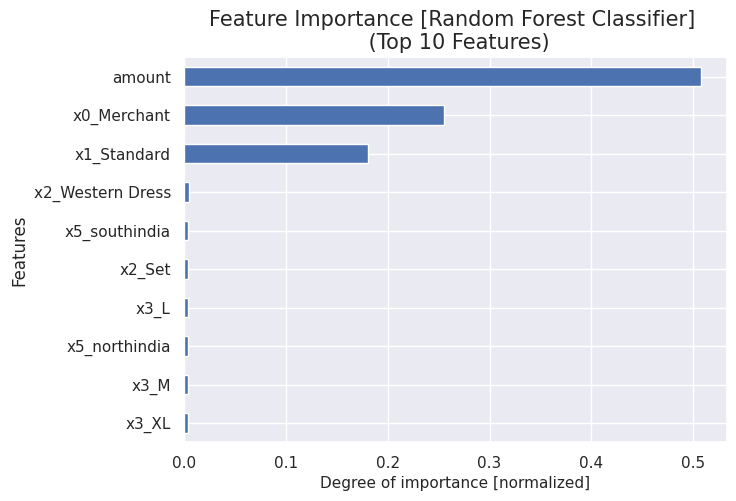

In [ ]:
# plot top 10 important features
fig, ax = plt.subplots(figsize = (7,5))
plt.title("Feature Importance [Random Forest Classifier] \n (Top 10 Features)", fontsize= 15)
feature_importances_rf.tail(10).plot(kind = "barh", ax = ax)
plt.xlabel("Degree of importance [normalized]",fontsize = 11)
plt.ylabel("Features", fontsize = 12)
plt.show()

## FINDINGS AND DISCUSSION
* Findings

In [ ]:
# tabular presentation of performances usind pandas dataframe

data_values = {
    "Model (Classifier)":["Logistic Regression","Random Forest"],
    "Accuracy":[accuracy_test_lr,accuracy_test_rf],
    "Precision":[precision_test_lr,precision_test_rf],
    "Recall":[recall_test_lr,recall_test_rf],
    "AUC":[auc_lr,auc_rf]
}
performance_table = pd.DataFrame(data_values)
performance_table

,Model (Classifier),Accuracy,Precision,Recall,AUC
0,Logistic Regression,81.45,100.00,56.85,0.803901
1,Random Forest,85.59,84.74,81.10,0.895893


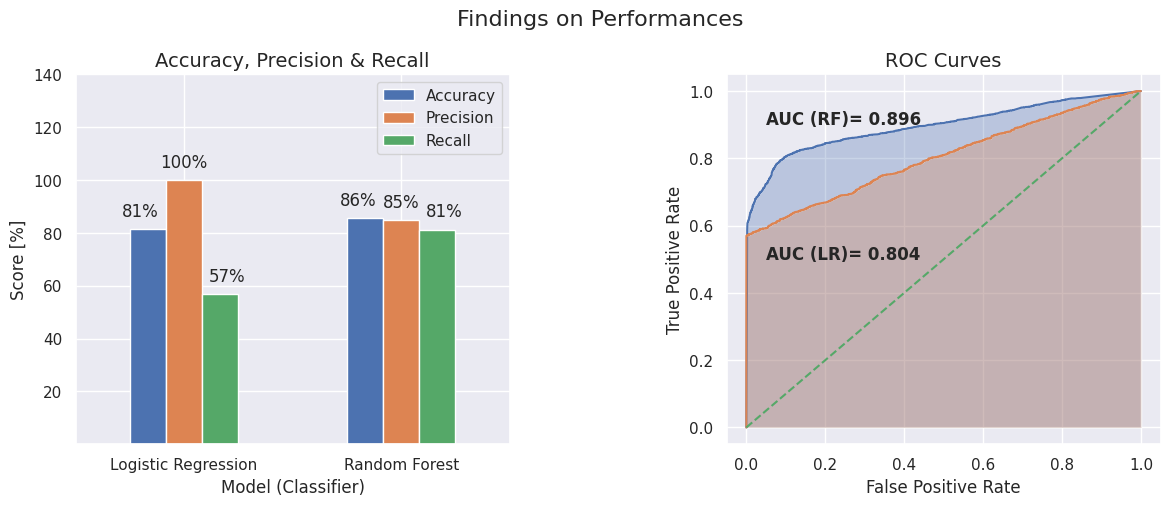

In [ ]:
# visualization of the consolidated performances
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (14,5))
plt.suptitle("Findings on Performances\n", fontsize = 16)
plt.subplots_adjust(wspace = 0.5, top = 0.85)

# plot for column chart
performance_table.plot(kind = "bar",x = "Model (Classifier)",
                       y = ["Accuracy","Precision","Recall"], ax = ax1)
ax1.set_title("Accuracy, Precision & Recall", fontsize = 14)
ax1.set_ylabel("Score [%]")
ax1.set_xticks(ticks = [0,1], labels = performance_table.iloc[:,0],rotation = 0 )
ax1.set_yticks(ticks = range(20,141,20))
ax1.legend(loc = "upper right")

#data labels of "logistic regression"
x = -0.2
for y in performance_table.iloc[0,1:4]:
    ax1.text(x,y+5,str(round(y))+"%",horizontalalignment = "center")
    x = x + 0.2

# data labels of "random forest"
x = 0.8
for y in performance_table.iloc[1,1:4]:
    ax1.text(x,y+5,str(round(y))+"%",horizontalalignment = "center")
    x = x + 0.2


# plot the ROC curves of both the models
ax2.plot(fpr_rf,tpr_rf)
ax2.plot(fpr_lr,tpr_lr)
ax2.plot([0,1],[0,1], linestyle = "--")
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("ROC Curves",fontsize = 14)
ax2.fill_between(fpr_rf,tpr_rf, alpha = 0.3)
ax2.fill_between(fpr_lr,tpr_lr, alpha = 0.3)
ax2.text(0.05,0.9,f"AUC (RF)= {round(auc_rf,3)}", fontweight = 700)
ax2.text(0.05,0.5,f"AUC (LR)= {round(auc_lr,3)}", fontweight = 700)
plt.show()

### Recomendation

* we may conclude that the important features impacting the decision of the customer in rejecting the orders or not are `order_amount`,`merchant` and `standard` as they are found having greater magnitude and in top five features, common, in both the models.